## Capstone Project Submission

* Student name: Jelena Sinclair
* Student pace: full time
* Scheduled project presentation date/time: 12 Oct 2023
* Instructor name: Rajive Islam
* Blog post URL: https://github.com/JelenaSinclair/Capstone.git

#### EDA

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats


In [2]:
# Importing data
df = pd.read_csv('Life-Expectancy-Data.csv')

In [3]:
# sort dataframe columns alphabetically for easier reference
df = df.reindex(sorted(df.columns), axis=1)

In [4]:
# move 'Life_expectancy' to first column for ease of coding and reference
df.insert(0,'Life_expectancy', df.pop('Life_expectancy'))

In [5]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Life_expectancy              2864 non-null   float64
 1   Adult_mortality              2864 non-null   float64
 2   Alcohol_consumption          2864 non-null   float64
 3   BMI                          2864 non-null   float64
 4   Country                      2864 non-null   object 
 5   Diphtheria                   2864 non-null   int64  
 6   Economy_status_Developed     2864 non-null   int64  
 7   Economy_status_Developing    2864 non-null   int64  
 8   GDP_per_capita               2864 non-null   int64  
 9   Hepatitis_B                  2864 non-null   int64  
 10  Incidence_HIV                2864 non-null   float64
 11  Infant_deaths                2864 non-null   float64
 12  Measles                      2864 non-null   int64  
 13  Polio             

In [6]:
# summary stats of variables
df.describe()

Life_expectancy  Adult_mortality  Alcohol_consumption          BMI  \
count      2864.000000      2864.000000          2864.000000  2864.000000   
mean         68.856075       192.251775             4.820882    25.032926   
std           9.405608       114.910281             3.981949     2.193905   
min          39.400000        49.384000             0.000000    19.800000   
25%          62.700000       106.910250             1.200000    23.200000   
50%          71.400000       163.841500             4.020000    25.500000   
75%          75.400000       246.791375             7.777500    26.400000   
max          83.800000       719.360500            17.870000    32.100000   

        Diphtheria  Economy_status_Developed  Economy_status_Developing  \
count  2864.000000               2864.000000                2864.000000   
mean     86.271648                  0.206704                   0.793296   
std      15.534225                  0.405012                   0.405012   
min      16.000000                  0.000000                   0.000000   
25%      81.000000                  0.000000                   1.000000   
50%      93.000000                  0.000000                   1.000000   
75%      97.000000                  0.000000                   1.000000   
max      99.000000                  1.000000                   1.000000   

       GDP_per_capita  Hepatitis_B  Incidence_HIV  Infant_deaths      Measles  \
count     2864.000000  2864.000000    2864.000000    2864.000000  2864.000000   
mean     11540.924930    84.292598       0.894288      30.363792    77.344972   
std      16934.788931    15.995511       2.381389      27.538117    18.659693   
min        148.000000    12.000000       0.010000       1.800000    10.000000   
25%       1415.750000    78.000000       0.080000       8.100000    64.000000   
50%       4217.000000    89.000000       0.150000      19.600000    83.000000   
75%      12557.000000    96.000000       0.460000      47.350000    93.000000   
max     112418.000000    99.000000      21.680000     138.100000    99.000000   

             Polio  Population_mill    Schooling  Thinness_five_nine_years  \
count  2864.000000      2864.000000  2864.000000               2864.000000   
mean     86.499651        36.675915     7.632123                  4.899825   
std      15.080365       136.485867     3.171556                  4.525217   
min       8.000000         0.080000     1.100000                  0.100000   
25%      81.000000         2.097500     5.100000                  1.600000   
50%      93.000000         7.850000     7.800000                  3.400000   
75%      97.000000        23.687500    10.300000                  7.300000   
max      99.000000      1379.860000    14.100000                 28.600000   

       Thinness_ten_nineteen_years  Under_five_deaths         Year  
count                  2864.000000        2864.000000  2864.000000  
mean                      4.865852          42.938268  2007.500000  
std                       4.438234          44.569974     4.610577  
min                       0.100000           2.300000  2000.000000  
25%                       1.600000           9.675000  2003.750000  
50%                       3.300000          23.100000  2007.500000  
75%                       7.200000          66.000000  2011.250000  
max                      27.700000         224.900000  2015.000000

In [7]:
# how many values are not a number (NaN)?
nan_count = df.isna().sum()/len(df)*100
nan_count

Life_expectancy                0.0
Adult_mortality                0.0
Alcohol_consumption            0.0
BMI                            0.0
Country                        0.0
Diphtheria                     0.0
Economy_status_Developed       0.0
Economy_status_Developing      0.0
GDP_per_capita                 0.0
Hepatitis_B                    0.0
Incidence_HIV                  0.0
Infant_deaths                  0.0
Measles                        0.0
Polio                          0.0
Population_mill                0.0
Region                         0.0
Schooling                      0.0
Thinness_five_nine_years       0.0
Thinness_ten_nineteen_years    0.0
Under_five_deaths              0.0
Year                           0.0
dtype: float64

C:\Users\Kristy\AppData\Local\Temp\ipykernel_9688\356698978.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ii,0].set_xticklabels(axs[ii,0].get_xticklabels(), rotation=45)
C:\Users\Kristy\AppData\Local\Temp\ipykernel_9688\356698978.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ii,1].set_xticklabels(axs[ii,1].get_xticklabels(), rotation=45)


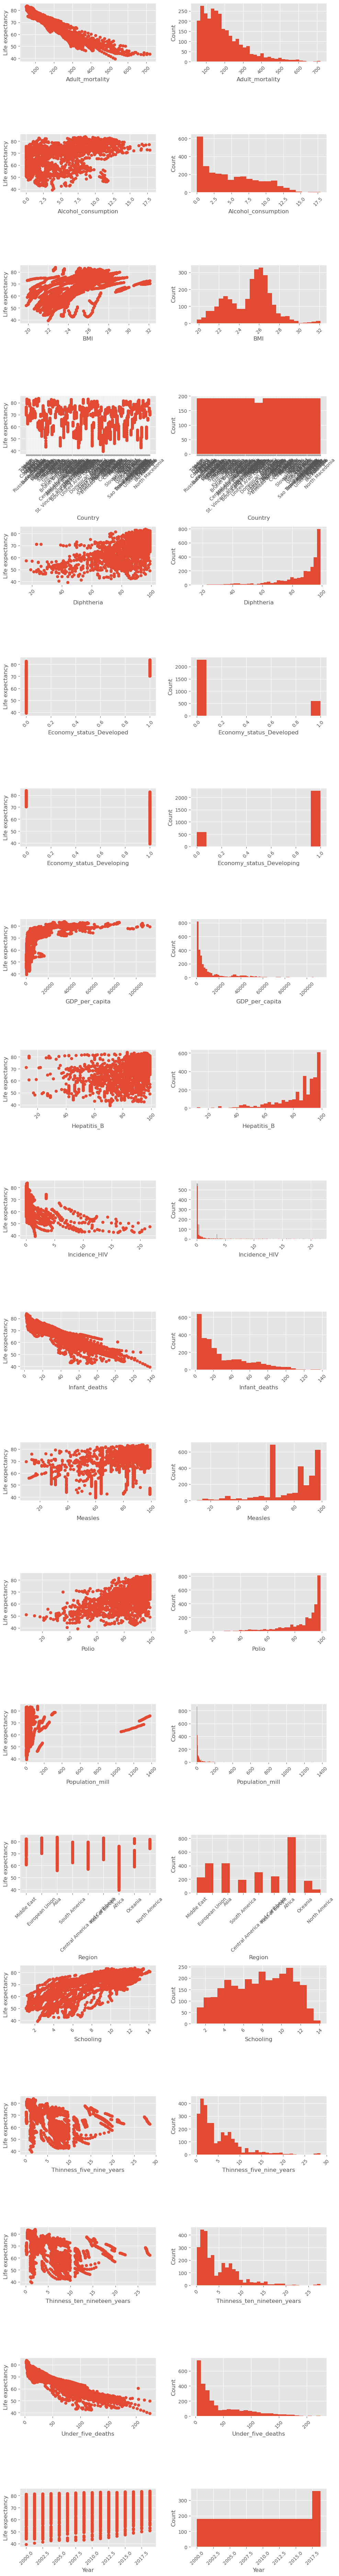

In [8]:
# get a list of variables (dataframe column names) and remove Life_expectancy as that's the dependent variable and 
#   what we're plotting against
var = list(df.columns)
var = var[1:]

# create a matrix of subplots, one row per variable, two columns each (one for scatter, one for histogram)
fig, axs = plt.subplots(nrows=len(var),ncols=2,figsize=(10,75))

# loop for each variable and plot scatter vs life_exp and histogram for distribution
for ii in range(0,len(var)):
    
    # scatter plot (0 in axs[] is selecting first plot column)
    axs[ii,0].scatter(df[var[ii]],df['Life_expectancy'])
    #axs[ii,0].set_title(var[ii])
    axs[ii,0].set_xlabel(var[ii])
    axs[ii,0].set_ylabel('Life expectancy')
    axs[ii,0].set_xticklabels(axs[ii,0].get_xticklabels(), rotation=45)

    
    # histogram plot (1 in axs[] is selecting second plot column)
    axs[ii,1].hist(df[var[ii]], bins='auto') # 179 bins because 179 countries or use 'auto'
    #axs[ii,1].set_title(var[ii])
    axs[ii,1].set_xlabel(var[ii])
    axs[ii,1].set_ylabel('Count')
    axs[ii,1].set_xticklabels(axs[ii,1].get_xticklabels(), rotation=45)
    
plt.tight_layout()


In [9]:
# drop country as categorical variable with many values (179), focus on region for now. Country could be used in a subsequent analysis
# drop Economy_status_Developing for one-hot encoding (multicolinearity trap with Economy_status_Developed)
# drop Adult_mortality, Infant_deaths, Under_five_deaths as highly linear with life expectancy as kinda measuring the same thing and not something that will charity spend areas
# i.e. not enough to just say put money towards adults not dying
# drop 'year' as time is not a factor we can control
df.drop(columns=['Country','Economy_status_Developing','Adult_mortality','Infant_deaths','Under_five_deaths','Year'], inplace=True)

In [10]:
# convert economic status to text for use as categorical variable
df['Economy_status_Developed'] = df['Economy_status_Developed'].astype(str)

In [11]:
# change vaccination one's from vaccination % to unvaccinated %
df['Hepatitis_B'] = 100-df['Hepatitis_B']
df['Measles'] = 100-df['Measles']
df['Polio'] = 100-df['Polio']
df['Diphtheria'] = 100-df['Diphtheria']

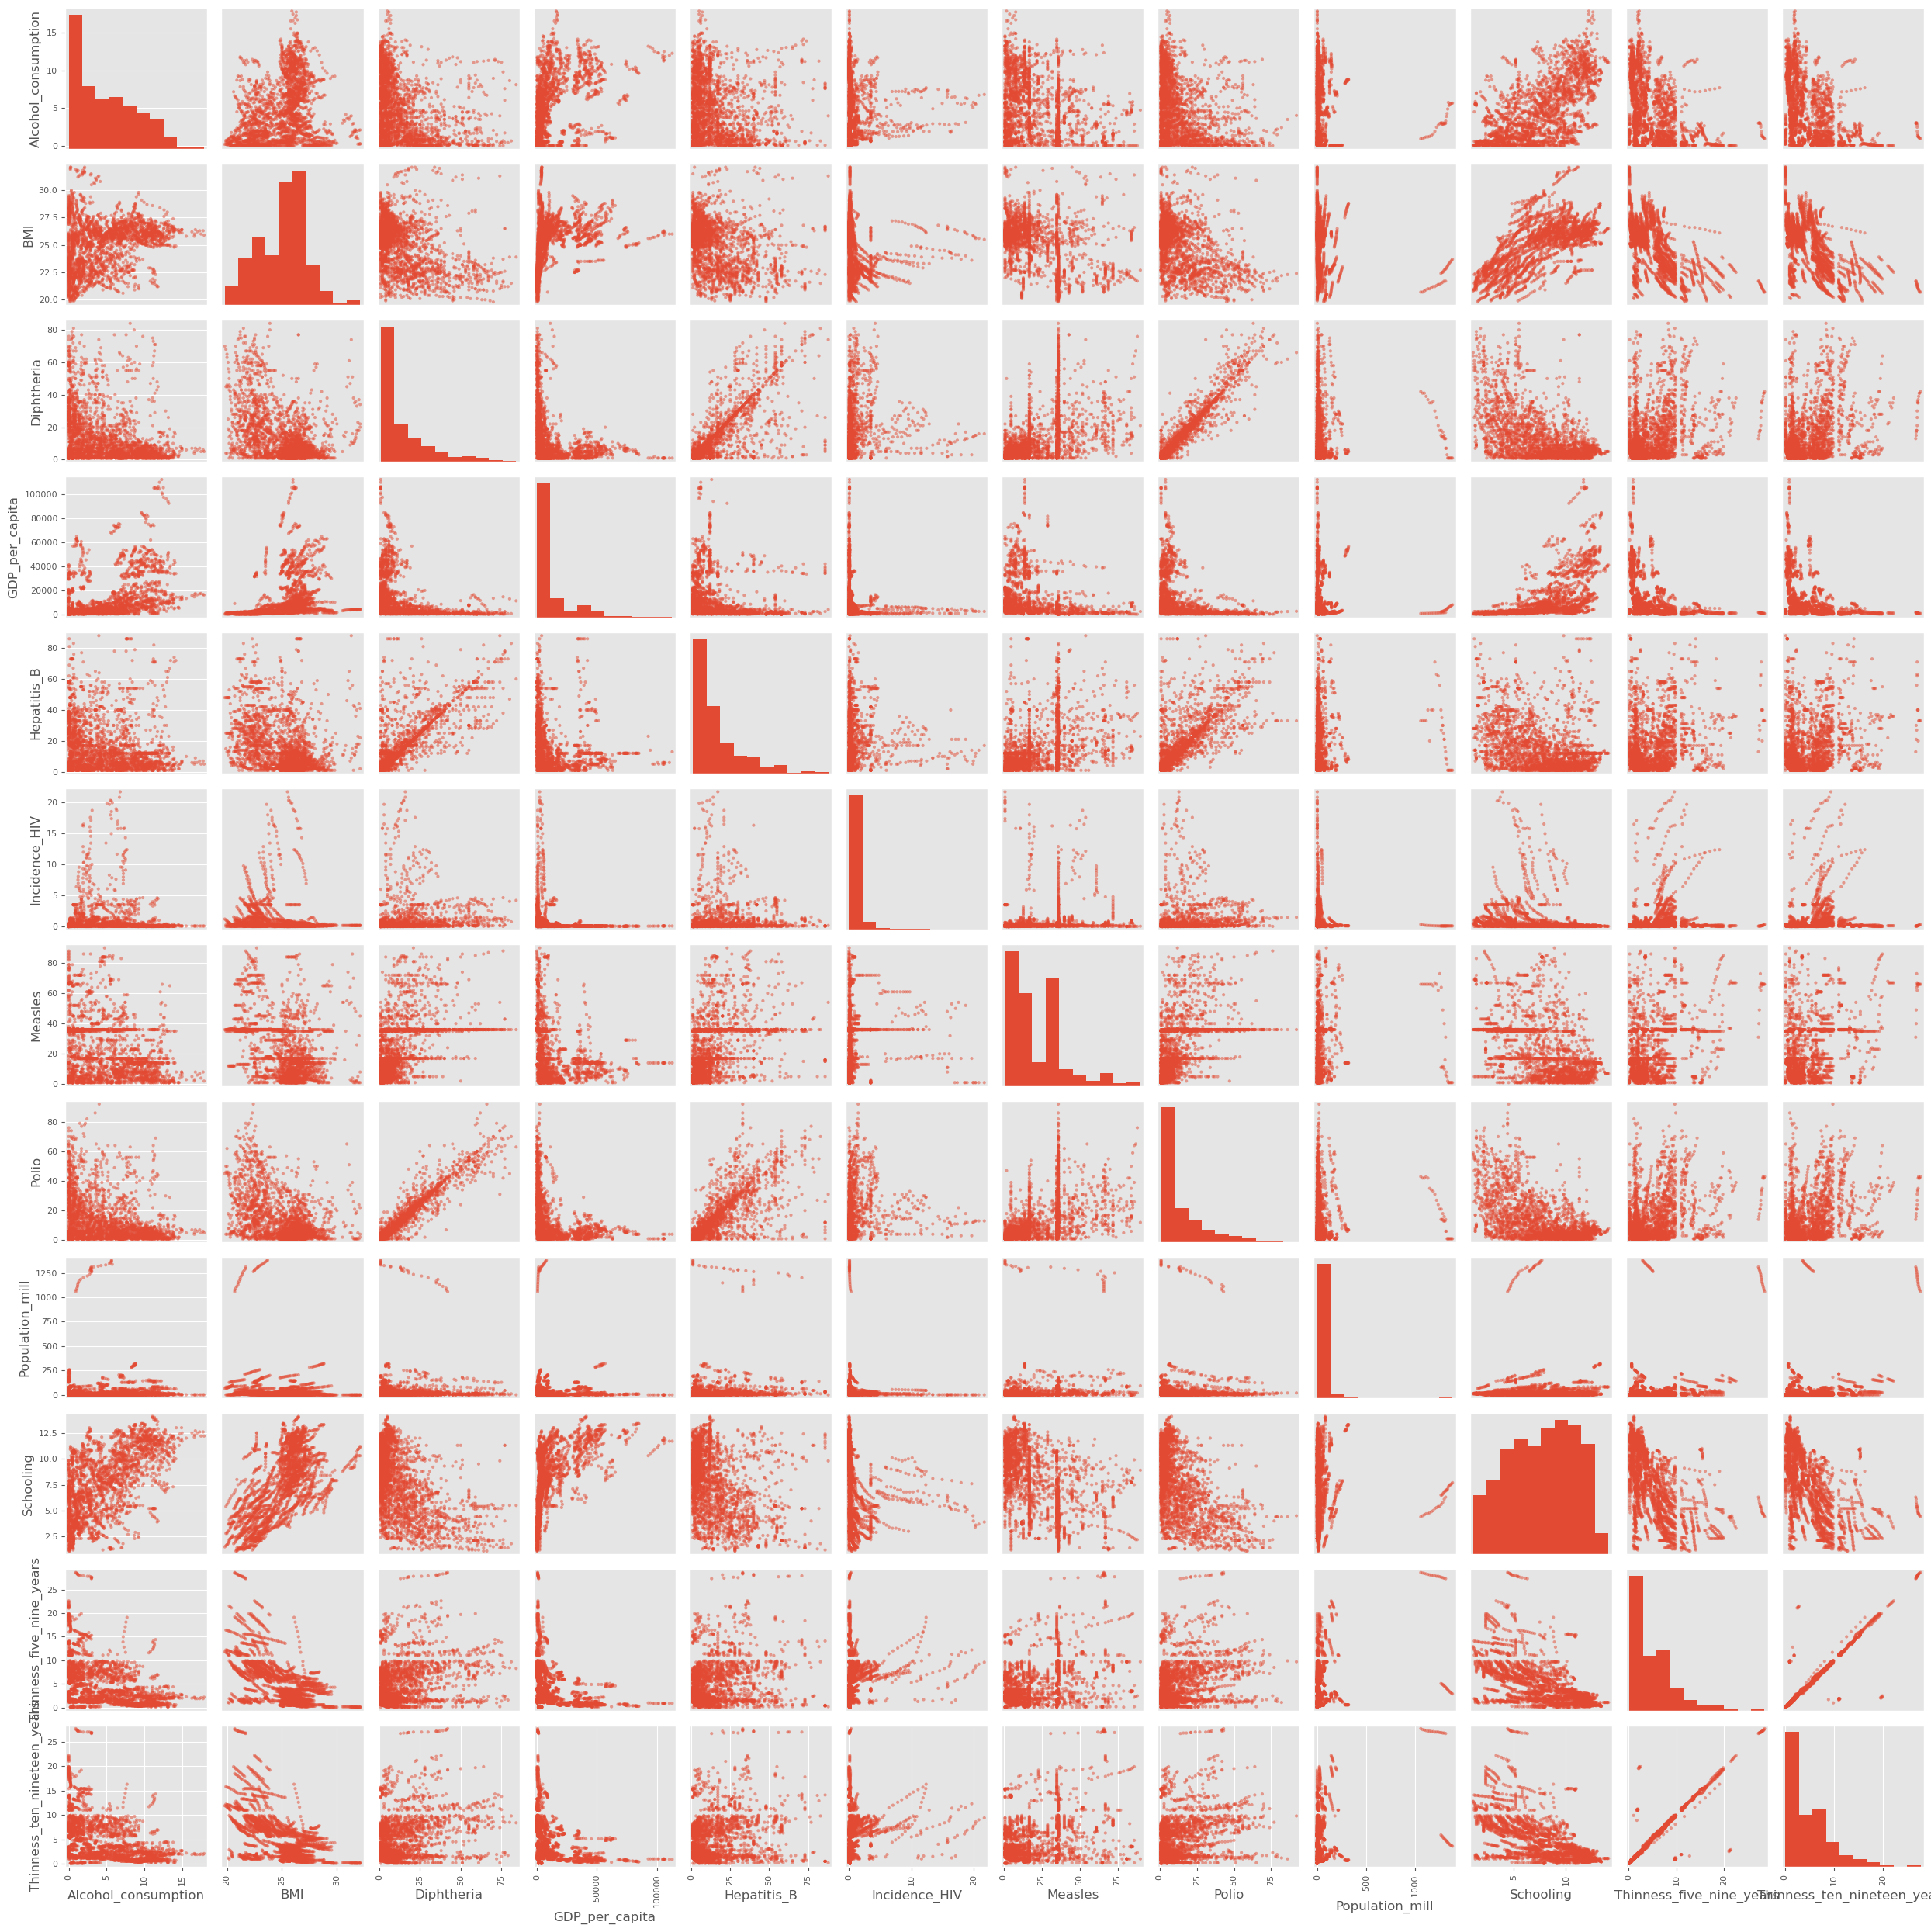

In [12]:
# plot matrix of scatter plots between each varaible
pd.plotting.scatter_matrix(df.iloc[:,1:], figsize=(25,25));
plt.tight_layout()


In [13]:
# some combinations look linearly correlated. Create a list of pairs with corr coef > 0.6
# use stack to create list of highly correlated pairs
df_cor = df.iloc[:,1:].corr(numeric_only=True).abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_cor['pairs'] = list(zip(df_cor.level_0, df_cor.level_1))

# set index to pairs
df_cor.set_index(['pairs'], inplace = True)

# drop level columns
df_cor.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_cor.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_cor.drop_duplicates(inplace=True)

# get list of pairs with correlation coefficient >0.6
df_cor[(df_cor.cc>.6) & (df_cor.cc <1)]


cc
pairs                                                       
(Diphtheria, Polio)                                 0.953178
(Thinness_ten_nineteen_years, Thinness_five_nin...  0.938757
(Diphtheria, Hepatitis_B)                           0.761780
(Polio, Hepatitis_B)                                0.724345
(BMI, Schooling)                                    0.635475
(Alcohol_consumption, Schooling)                    0.615728

In [14]:
# drop diptheria as highly-correlated with Polio and Hep_B
# remove Thinness_five_nine_years as highly correlated with Thinness_ten_nineteen_years - 
#    10-19 chosen as skinny kids make skinny teens and sometimes kids are just skinny
df.drop(columns=['Diphtheria','Thinness_five_nine_years'], inplace=True)

In [15]:
# calculate baseline model
outcome = 'Life_expectancy'
predictors = df.drop('Life_expectancy',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [16]:
model = ols(formula=formula,data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     925.5
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:54:36   Log-Likelihood:                -7658.9
No. Observations:                2864   AIC:                         1.536e+04
Df Residuals:                    2844   BIC:                         1.548e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  47.9995      1.338     35.875      0.000      45.376      50.623
Economy_status_Developed[T.1]               4.3076      0.431      9.990      0.000       3.462       5.153
Region[T.Asia]                              3.9038      0.274     14.259      0.000       3.367       4.441
Region[T.Central America and Caribbean]     5.9537      0.297     20.065      0.000       5.372       6.535
Region[T.European Union]                    3.4978      0.457      7.651      0.000       2.601       4.394
Region[T.Middle East]                       4.3800      0.346     12.663      0.000       3.702       5.058
Region[T.North America]                     2.9799      0.625      4.766      0.000       1.754       4.206
Region[T.Oceania]                           2.3233      0.366      6.354      0.000       1.606       3.040
Region[T.Rest of Europe]                    4.1972      0.352     11.933      0.000       3.508       4.887
Region[T.South America]                     6.6973      0.338     19.812      0.000       6.034       7.360
Alcohol_consumption                        -0.2079      0.030     -6.994      0.000      -0.266      -0.150
BMI                                         0.6417      0.056     11.424      0.000       0.532       0.752
GDP_per_capita                           9.384e-05   5.99e-06     15.676      0.000    8.21e-05       0.000
Hepatitis_B                                 0.0019      0.006      0.308      0.758      -0.010       0.014
Incidence_HIV                              -1.1876      0.033    -36.173      0.000      -1.252      -1.123
Measles                                    -0.0165      0.004     -3.665      0.000      -0.025      -0.008
Polio                                      -0.1610      0.007    -21.578      0.000      -0.176      -0.146
Population_mill                             0.0029      0.001      5.567      0.000       0.002       0.004
Schooling                                   0.5109      0.045     11.298      0.000       0.422       0.600
Thinness_ten_nineteen_years                 0.0635      0.022      2.833      0.005       0.020       0.107
==============================================================================
Omnibus:                        4.024   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.578
Skew:                          -0.013   Prob(JB):                        0.167
Kurtosis:                       2.829   Cond. No.                     4.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number 

Skew and Kurtosis good, normal residuals. Still have collinearity issues

R^2 0.861 which is very strong

Visualise error terms

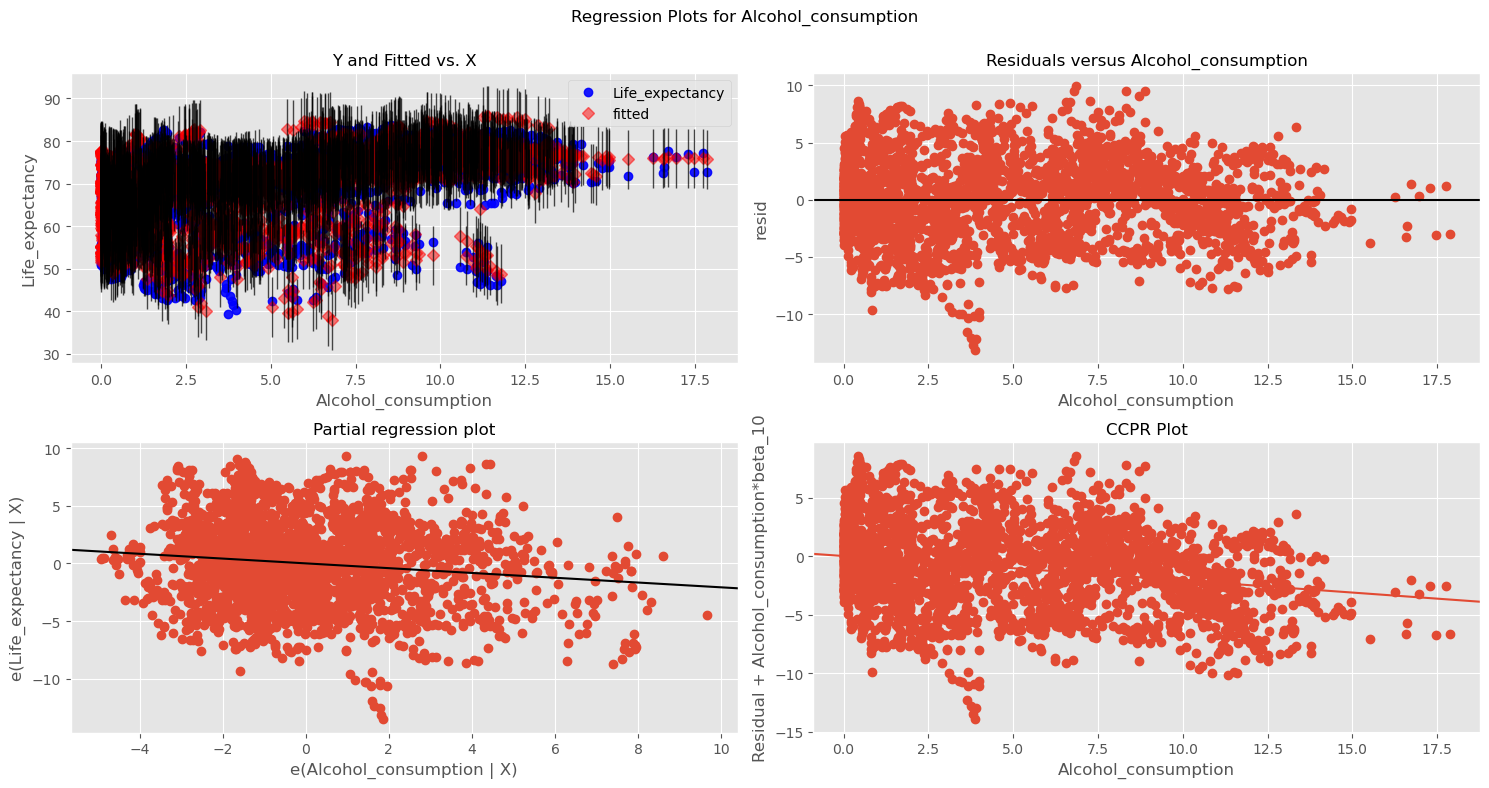

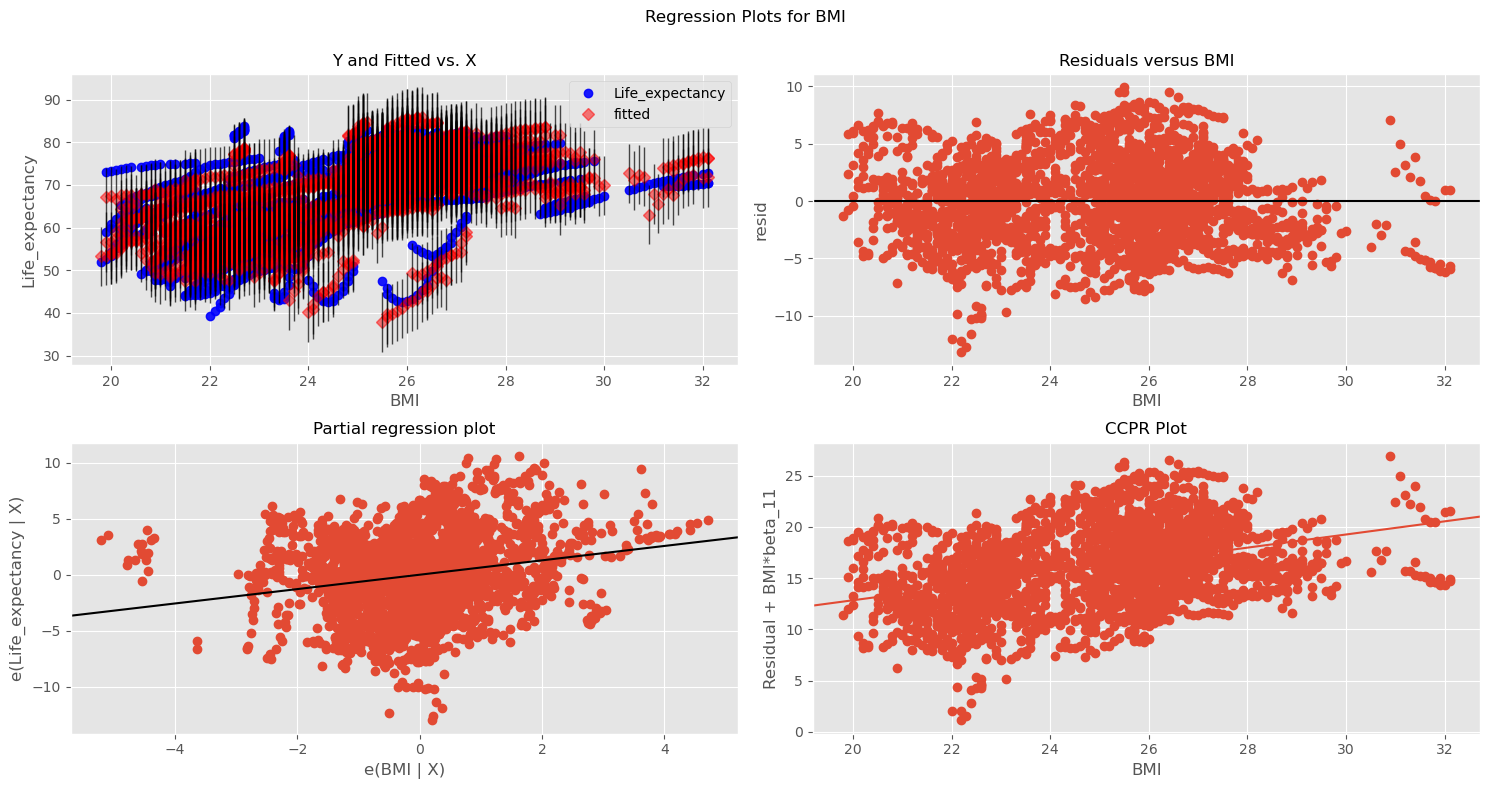

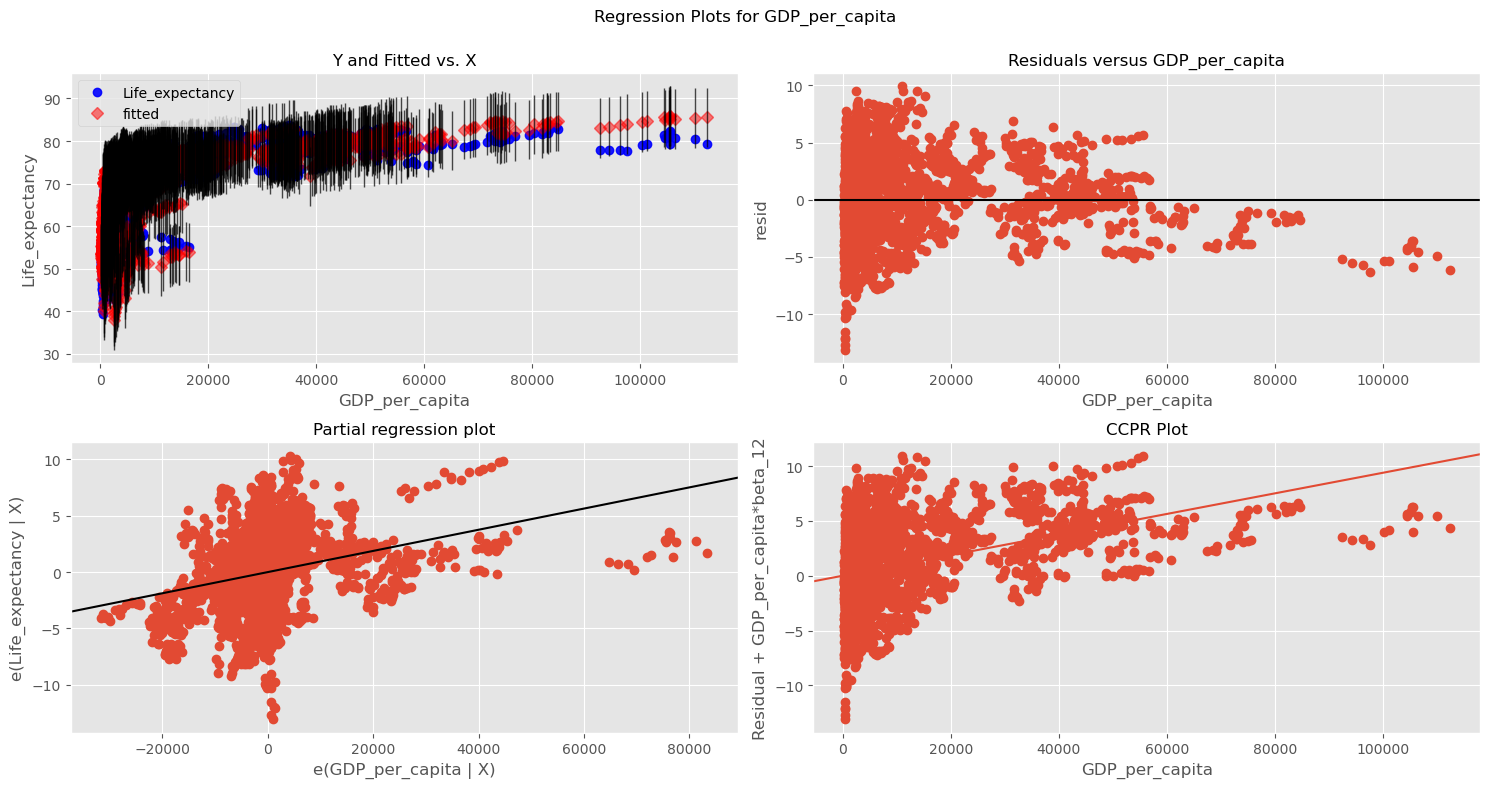

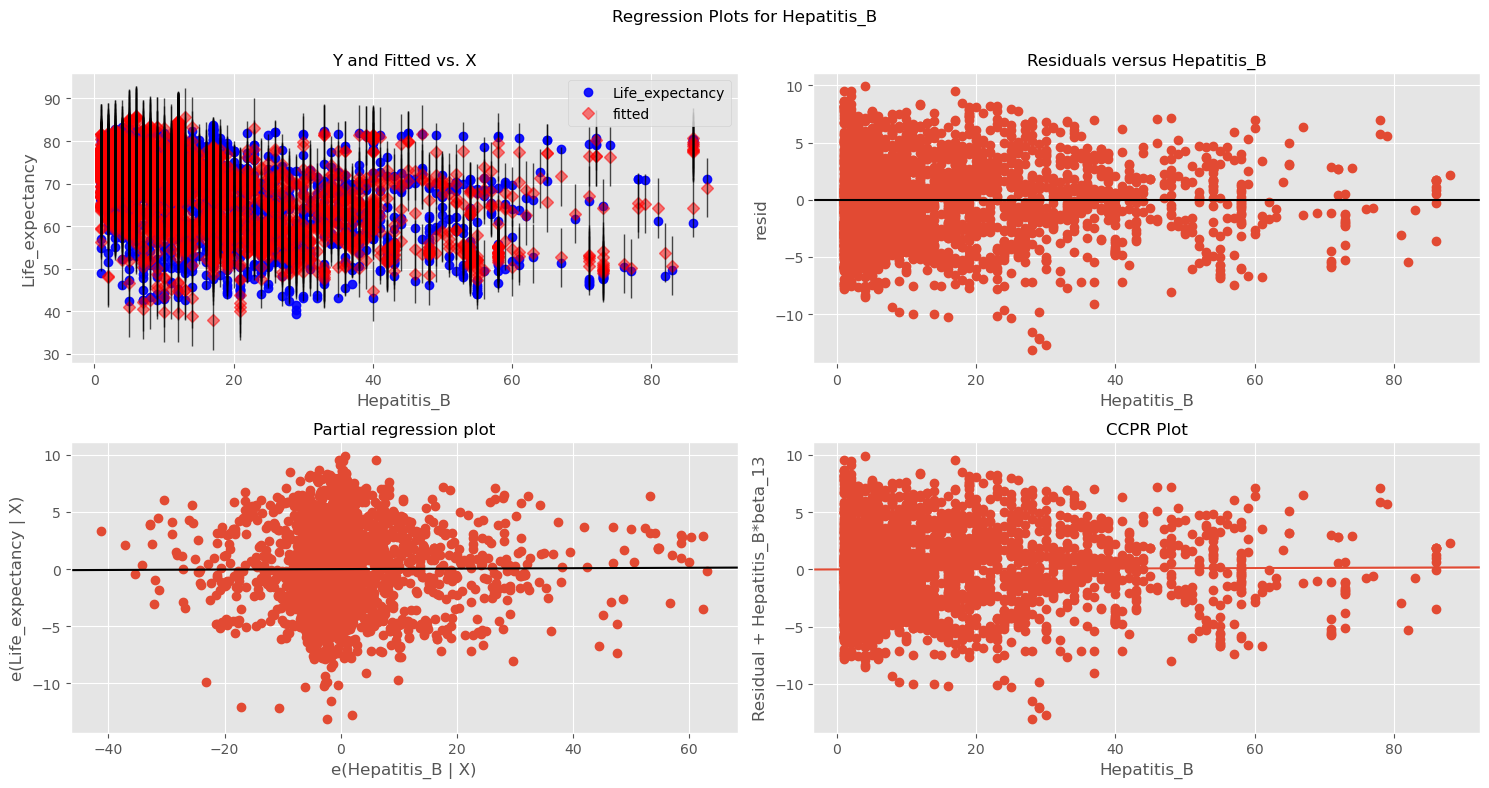

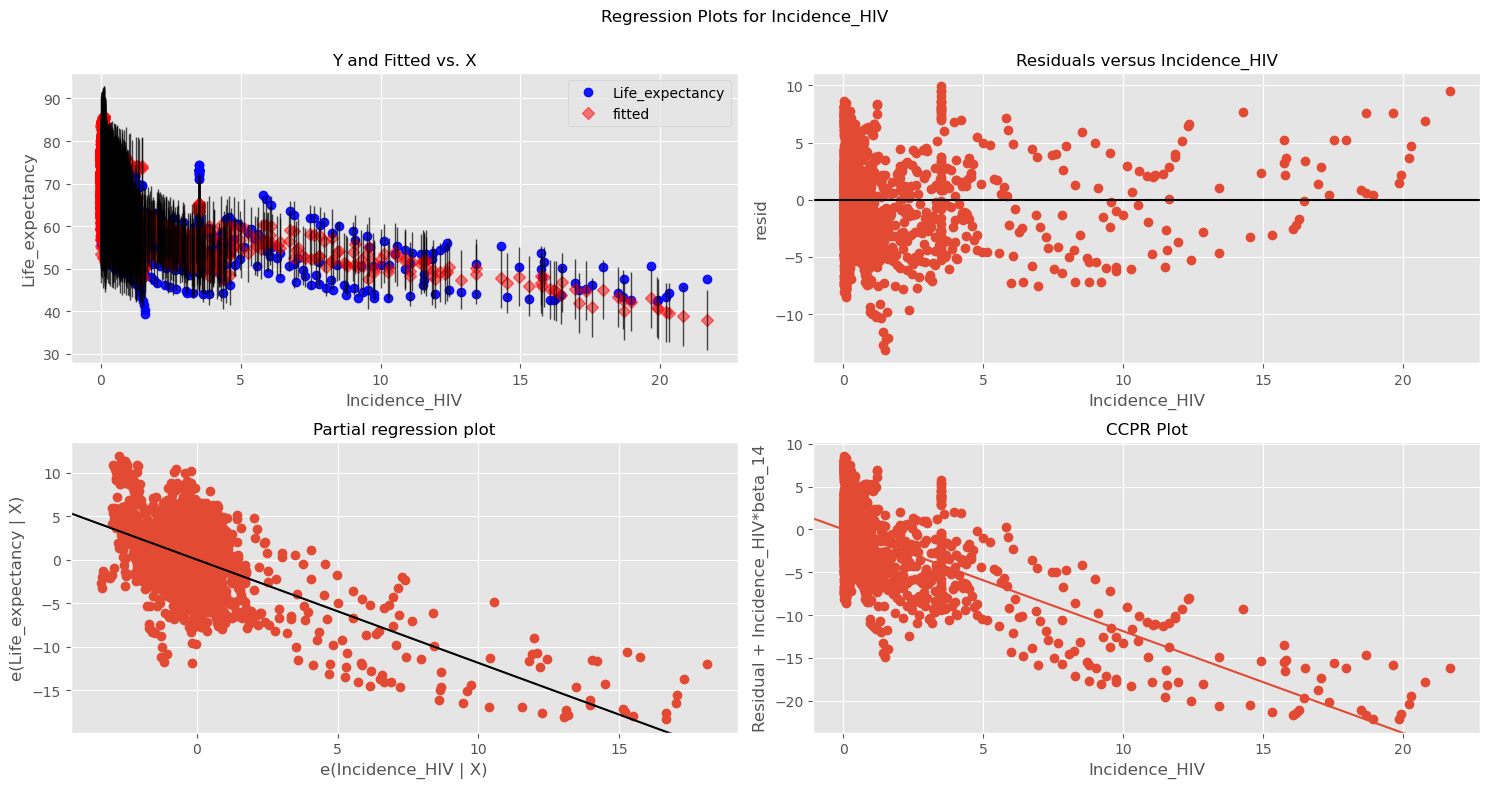

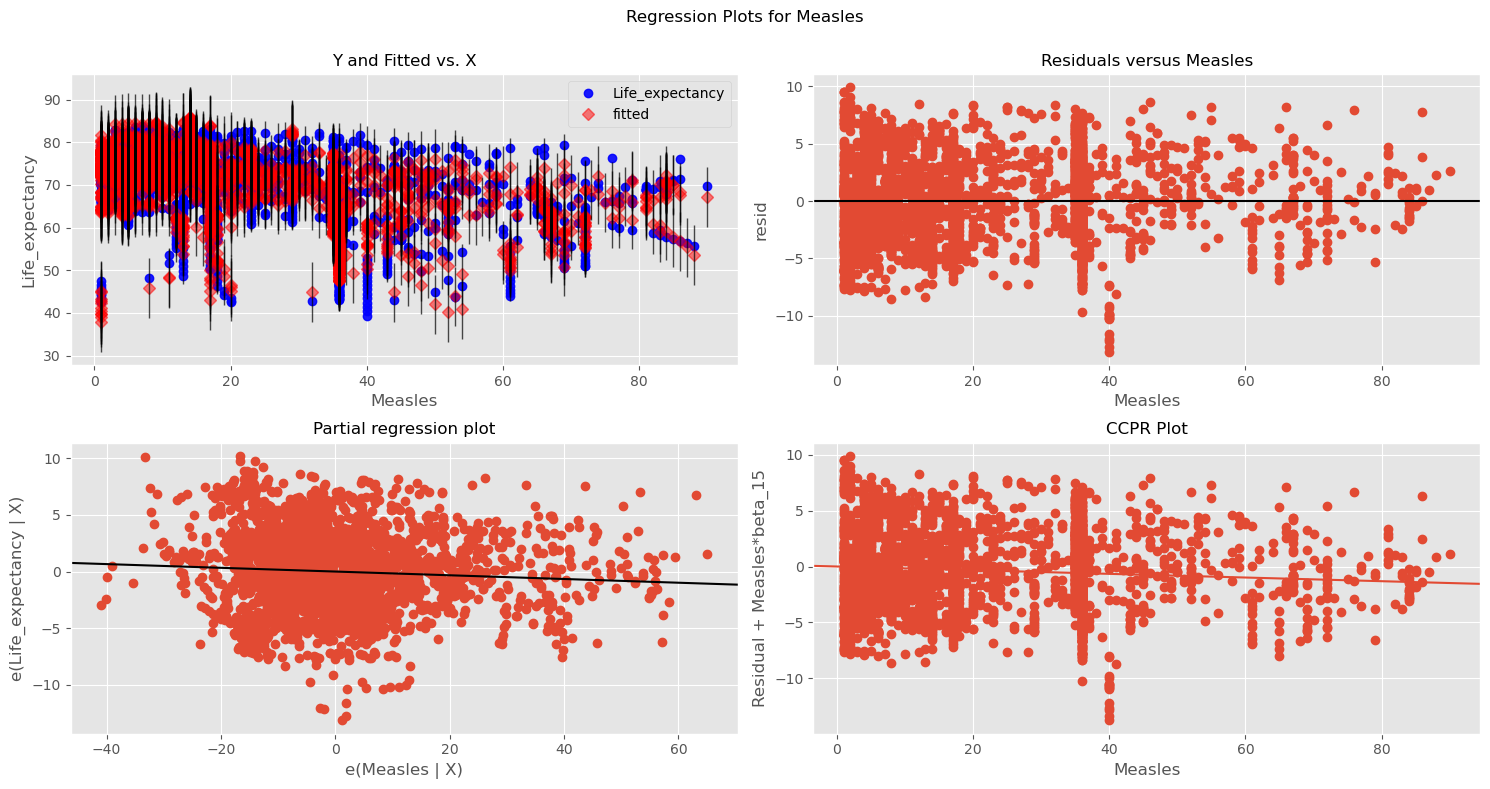

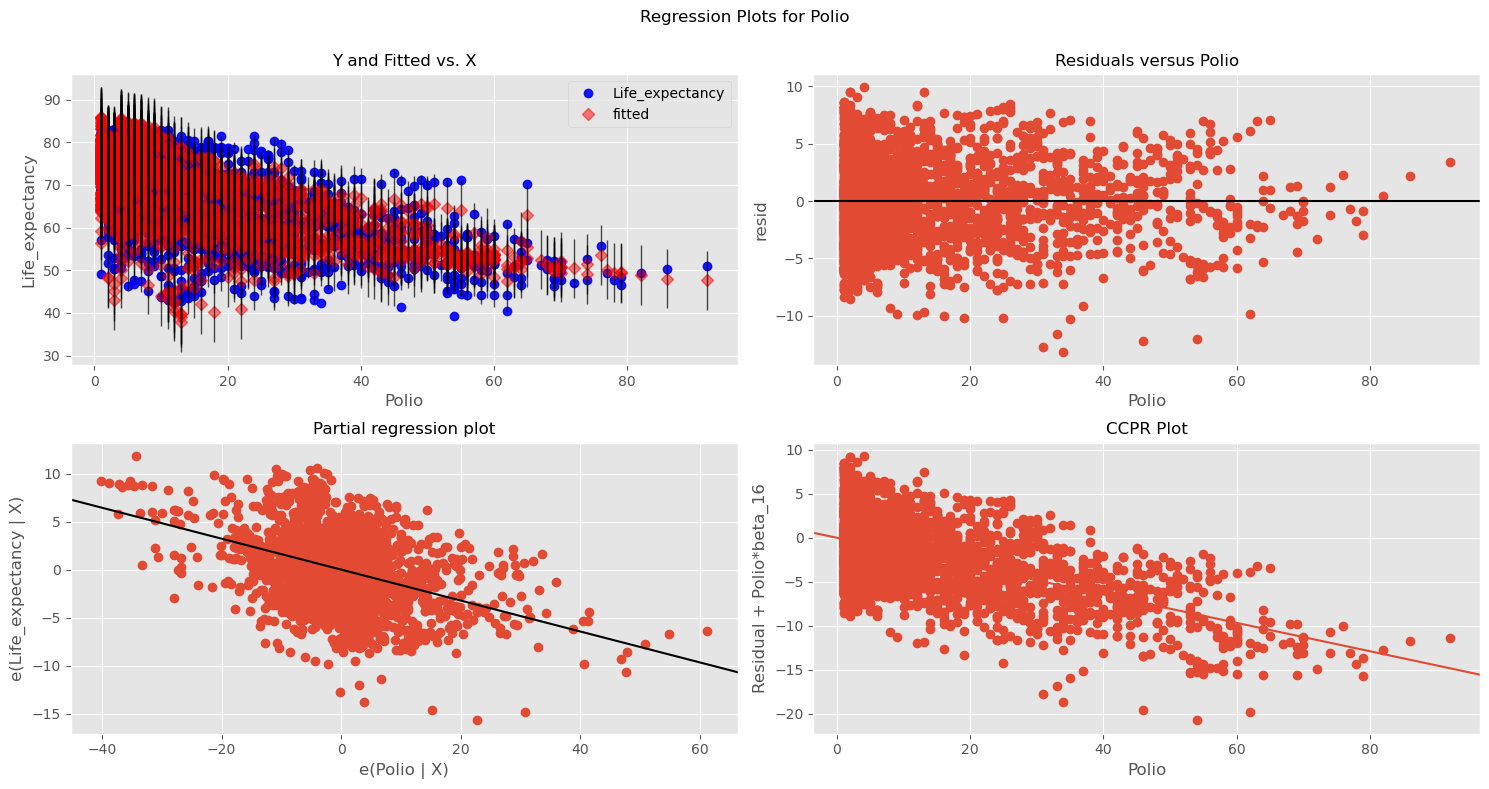

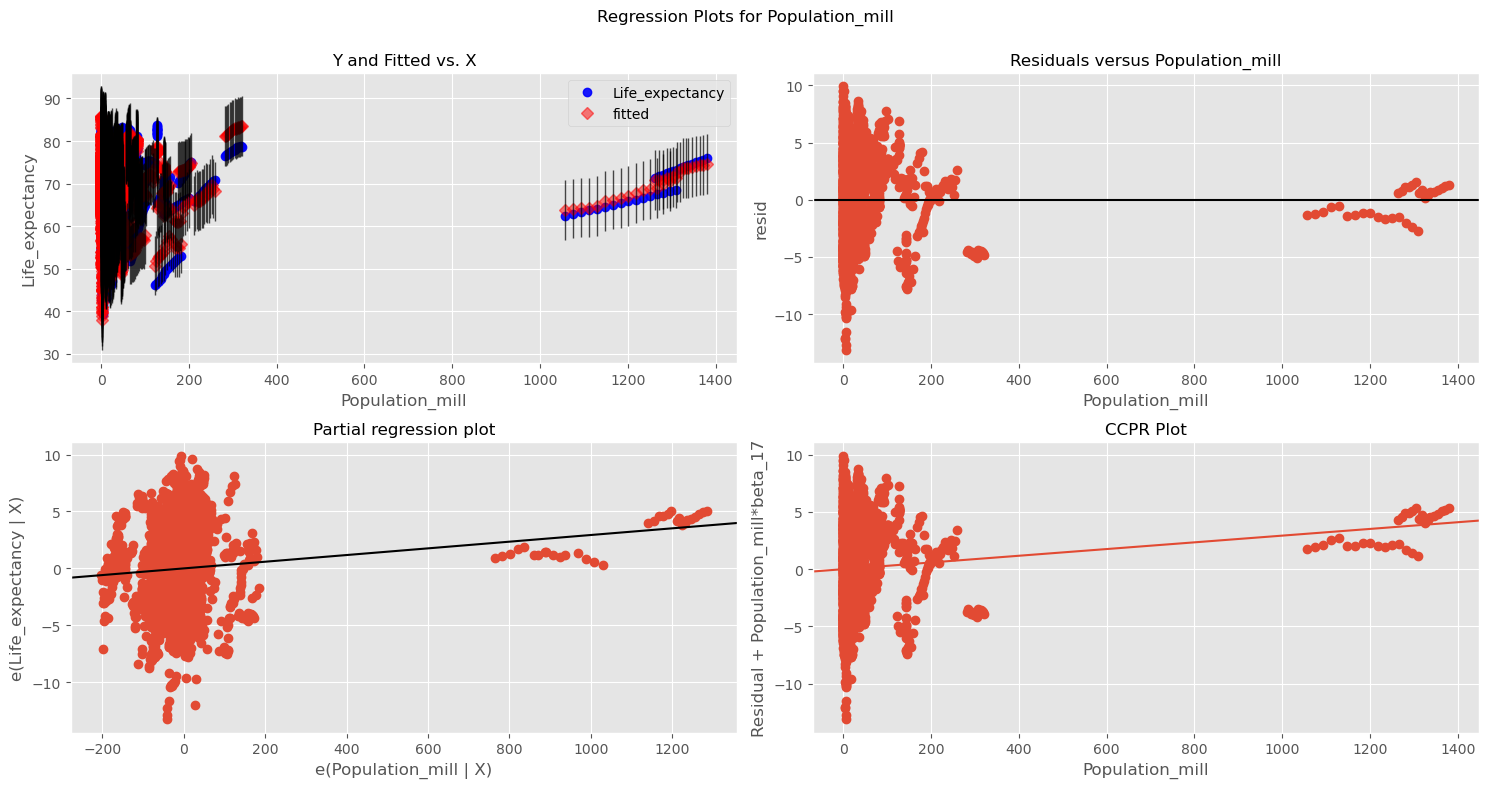

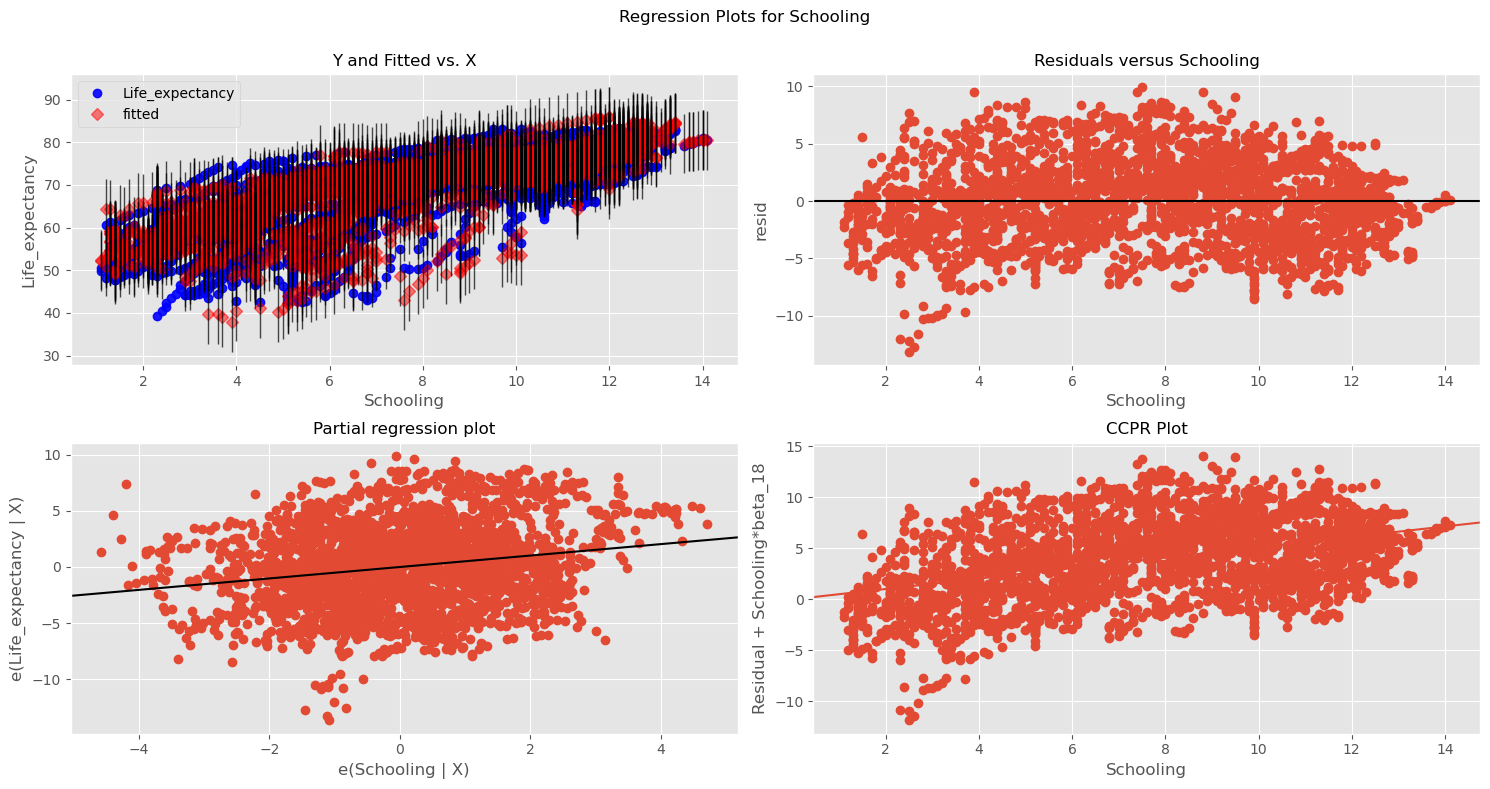

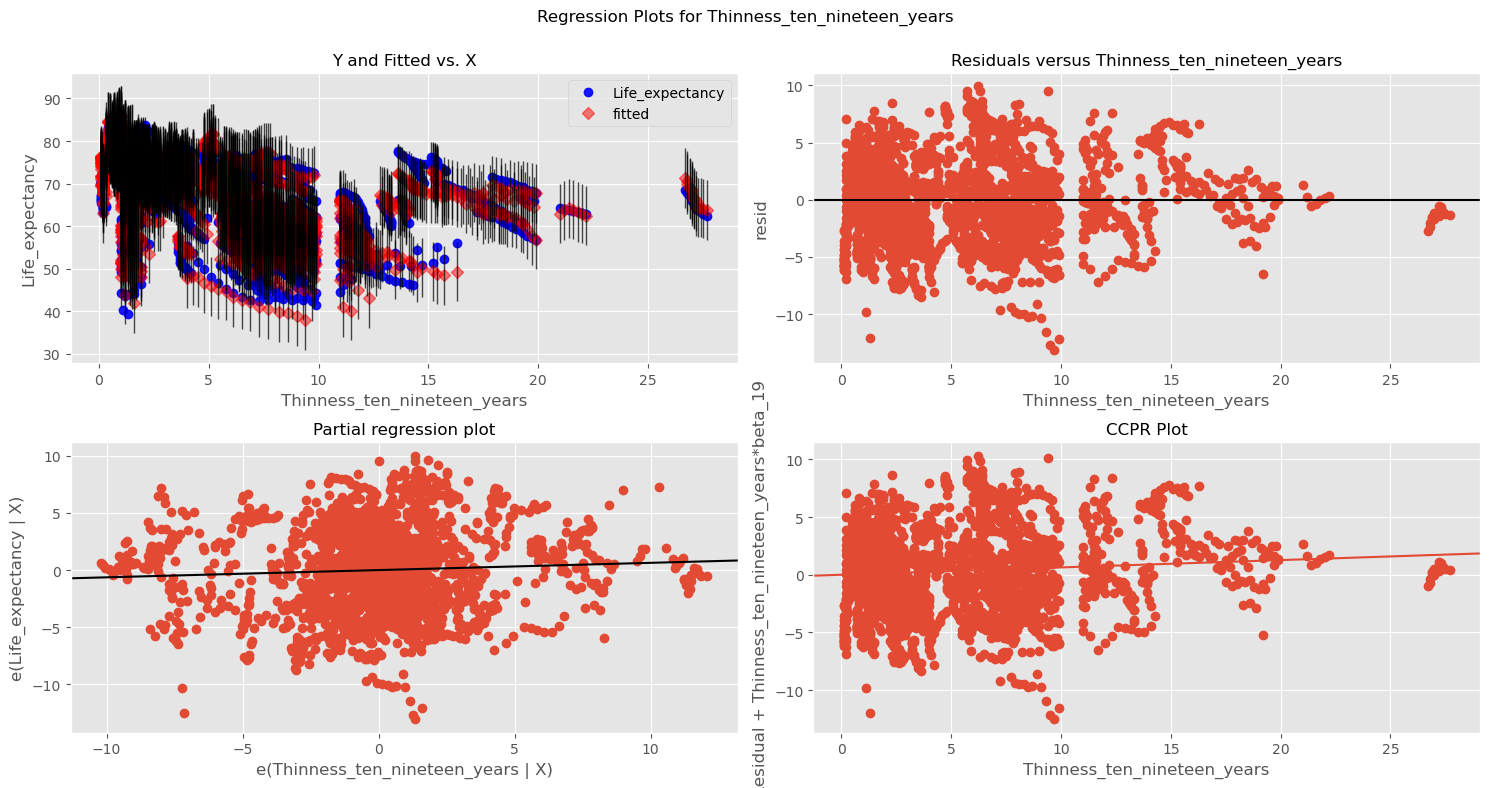

In [17]:
# List of predictor variables for which you want to create diagnostic plots
predictor_variables = ["Alcohol_consumption", "BMI","GDP_per_capita", "Hepatitis_B", "Incidence_HIV","Measles","Polio","Population_mill","Schooling","Thinness_ten_nineteen_years"]

# Create a loop to generate diagnostic plots for each predictor
for predictor in predictor_variables:
    try:
        fig = plt.figure(figsize=(15, 8))
        fig = sm.graphics.plot_regress_exog(model, predictor, fig=fig)
        plt.show()
    except ValueError:
        print(f"'{predictor}' is not in the list of DataFrame columns.")


Many residuals cone shaped showing signs of heteroskedasticity - try transforming data

First look at Q-Q plot

C:\Users\Kristy\AppData\Local\Temp\ipykernel_9688\3740694945.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


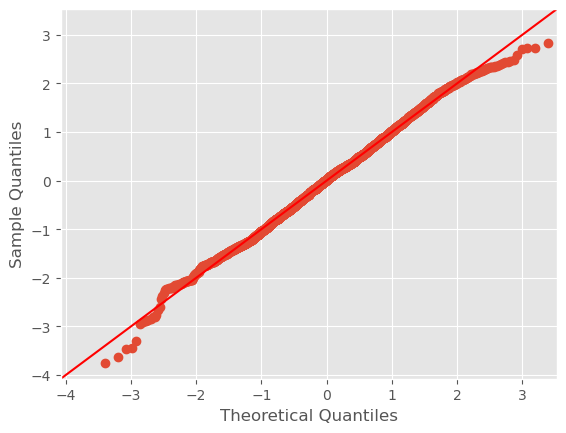

In [18]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Looking good!

But still have to tidy, deal with multicoll and heteroscedasticity

In [19]:
# backup dataframe data so can restore if transformation's no good
dfc = df.copy()

In [20]:
# check if any variables <=0 which could cause transformation issues
df.describe()

Life_expectancy  Alcohol_consumption          BMI  GDP_per_capita  \
count      2864.000000          2864.000000  2864.000000     2864.000000   
mean         68.856075             4.820882    25.032926    11540.924930   
std           9.405608             3.981949     2.193905    16934.788931   
min          39.400000             0.000000    19.800000      148.000000   
25%          62.700000             1.200000    23.200000     1415.750000   
50%          71.400000             4.020000    25.500000     4217.000000   
75%          75.400000             7.777500    26.400000    12557.000000   
max          83.800000            17.870000    32.100000   112418.000000   

       Hepatitis_B  Incidence_HIV      Measles        Polio  Population_mill  \
count  2864.000000    2864.000000  2864.000000  2864.000000      2864.000000   
mean     15.707402       0.894288    22.655028    13.500349        36.675915   
std      15.995511       2.381389    18.659693    15.080365       136.485867   
min       1.000000       0.010000     1.000000     1.000000         0.080000   
25%       4.000000       0.080000     7.000000     3.000000         2.097500   
50%      11.000000       0.150000    17.000000     7.000000         7.850000   
75%      22.000000       0.460000    36.000000    19.000000        23.687500   
max      88.000000      21.680000    90.000000    92.000000      1379.860000   

         Schooling  Thinness_ten_nineteen_years  
count  2864.000000                  2864.000000  
mean      7.632123                     4.865852  
std       3.171556                     4.438234  
min       1.100000                     0.100000  
25%       5.100000                     1.600000  
50%       7.800000                     3.300000  
75%      10.300000                     7.200000  
max      14.100000                    27.700000

In [21]:
# Alcohol has 0 values, so need to add a small amount
dfc['Alcohol_consumption']=dfc['Alcohol_consumption']+0.01 # add a little something to avoid log(0)

In [22]:
# try different scalings and assess effect on model
import re

# list of scaling functions
scl_fn = [
    lambda x: np.log(x),
    lambda x: np.sqrt(x),
    lambda x: 1/x
]

# list of scaling function names
scl_fn_name = [
    "log: ",
    "sqrt: ",
    "1/x: "
]

scl_vars = ["Alcohol_consumption", "BMI","GDP_per_capita", "Hepatitis_B", "Incidence_HIV","Measles","Polio","Population_mill","Schooling","Thinness_ten_nineteen_years"]

# model parameters that only need to run once
outcome = 'Life_expectancy'
predictors = dfc.drop('Life_expectancy',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

# re-run baseline model
model = ols(formula=formula,data=dfc).fit()
summary = model.summary()
            
# parse the summary text to extract skew and kurtosis
summary_text = summary.tables[0].as_text()

# create a pattern of text we are looking for (search trough the OLS results to extract 'skew', 'kurtosis', etc)
skew_pattern = r"Skew:\s+([-+]?\d*\.\d+|\d+)"
skew_match = re.search(skew_pattern, summary.as_text())
skew = float(skew_match.group(1))
            
kurt_pattern = r"Kurtosis:\s+([-+]?\d*\.\d+|\d+)"
kurt_match = re.search(kurt_pattern, summary.as_text())
kurt = float(kurt_match.group(1))
            
JBp_pattern = r"Prob\(JB\):\s+([-+]?\d*\.\d+|\d+)"
JBp_match = re.search(JBp_pattern, summary.as_text())
JBp = float(JBp_match.group(1))
            
Op_pattern = r"Prob\(Omnibus\):\s+([-+]?\d*\.\d+|\d+)"
Op_match = re.search(Op_pattern, summary.as_text())
Op = float(Op_match.group(1))
           
res = [{
    'Name': 'Baseline',            
    'R-squared': round(model.rsquared,3), # get R2 from model
    'Cond. No.': round(model.condition_number,1), # get Cond. No. from model
    'Skew': skew,
    'Kurtosis': kurt,
    'Omni p': Op,
    'JB p': JBp,
    'F p': round(model.f_pvalue,3) # get p-value from model
}]

# loop through each variable trying different transformations on just that variable
for var in scl_vars:
    
    # loop for each transformation type
    for func_ind in range(0,len(scl_fn)):
            dfs = dfc.copy()  # restore untransformed data
            dfs[var] = dfs[var].map(scl_fn[func_ind])  # apply transformation
            dfs[var] = (dfs[var] - np.mean(dfs[var])) / np.sqrt(np.var(dfs[var]))    # normalise using standardization
            
            # re-calculate model
            model = ols(formula=formula,data=dfs).fit()
            summary = model.summary()
            
            # Parse the summary text to extract skew and kurtosis
            summary_text = summary.tables[0].as_text()
            
            skew_pattern = r"Skew:\s+([-+]?\d*\.\d+|\d+)"
            skew_match = re.search(skew_pattern, summary.as_text())
            skew = float(skew_match.group(1))
            
            kurt_pattern = r"Kurtosis:\s+([-+]?\d*\.\d+|\d+)"
            kurt_match = re.search(kurt_pattern, summary.as_text())
            kurt = float(kurt_match.group(1))
            
            JBp_pattern = r"Prob\(JB\):\s+([-+]?\d*\.\d+|\d+)"
            JBp_match = re.search(JBp_pattern, summary.as_text())
            JBp = float(JBp_match.group(1))
            
            Op_pattern = r"Prob\(Omnibus\):\s+([-+]?\d*\.\d+|\d+)"
            Op_match = re.search(Op_pattern, summary.as_text())
            Op = float(Op_match.group(1))
           
            res.append({                              # add result to dict
                'Name': scl_fn_name[func_ind]+var,
                'R-squared': round(model.rsquared,3),
                'Cond. No.': round(model.condition_number,1),
                'Skew': skew,
                'Kurtosis': kurt,
                'Omni p': Op,
                'JB p': JBp,
                'F p': round(model.f_pvalue,3)
            })


In [23]:
# convert results to a dataframe
res_df = pd.DataFrame(res)

In [24]:
# compare results of transforming each var using different functions 
res_df

Name  R-squared  Cond. No.   Skew  Kurtosis  \
0                            Baseline      0.861   426893.4 -0.013     2.829   
1            log: Alcohol_consumption      0.859   429894.1  0.017     2.842   
2           sqrt: Alcohol_consumption      0.860   425620.7  0.012     2.814   
3            1/x: Alcohol_consumption      0.858   430005.9 -0.032     2.892   
4                            log: BMI      0.861   248523.2 -0.017     2.833   
5                           sqrt: BMI      0.861   248685.0 -0.015     2.830   
6                            1/x: BMI      0.862   247914.2 -0.021     2.844   
7                 log: GDP_per_capita      0.892     3131.2 -0.066     3.213   
8                sqrt: GDP_per_capita      0.874     3005.5 -0.011     2.974   
9                 1/x: GDP_per_capita      0.869     3107.3 -0.114     3.056   
10                   log: Hepatitis_B      0.861   426122.9 -0.013     2.837   
11                  sqrt: Hepatitis_B      0.861   425977.9 -0.013     2.832   
12                   1/x: Hepatitis_B      0.861   425972.6 -0.010     2.849   
13                 log: Incidence_HIV      0.847   425434.2 -0.097     3.588   
14                sqrt: Incidence_HIV      0.871   426237.6  0.055     3.092   
15                 1/x: Incidence_HIV      0.801   426352.2 -0.504     4.708   
16                       log: Measles      0.861   425146.2 -0.012     2.819   
17                      sqrt: Measles      0.861   424518.6 -0.016     2.821   
18                       1/x: Measles      0.860   424806.8  0.005     2.834   
19                         log: Polio      0.846   423549.6 -0.038     2.876   
20                        sqrt: Polio      0.856   423834.4 -0.021     2.818   
21                         1/x: Polio      0.839   423125.8  0.002     2.975   
22               log: Population_mill      0.860   434325.7 -0.008     2.875   
23              sqrt: Population_mill      0.862   427356.3 -0.010     2.848   
24               1/x: Population_mill      0.859   443102.2 -0.025     2.825   
25                     log: Schooling      0.868   460443.3 -0.081     2.864   
26                    sqrt: Schooling      0.865   464442.7 -0.044     2.839   
27                     1/x: Schooling      0.867   441993.9 -0.093     2.898   
28   log: Thinness_ten_nineteen_years      0.861   438858.3 -0.016     2.837   
29  sqrt: Thinness_ten_nineteen_years      0.861   425088.2 -0.015     2.835   
30   1/x: Thinness_ten_nineteen_years      0.862   438392.0 -0.032     2.876   

    Omni p    JB p  F p  
0    0.134  0.1670  0.0  
1    0.179  0.2100  0.0  
2    0.088  0.1220  0.0  
3    0.389  0.3910  0.0  
4    0.146  0.1780  0.0  
5    0.137  0.1700  0.0  
6    0.182  0.2110  0.0  
7    0.032  0.0233  0.0  
8    0.947  0.9330  0.0  
9    0.036  0.0366  0.0  
10   0.167  0.1990  0.0  
11   0.144  0.1770  0.0  
12   0.223  0.2520  0.0  
13   0.000  1.2200  0.0  
14   0.281  0.2900  0.0  
15   0.000  1.1900  0.0  
16   0.103  0.1360  0.0  
17   0.105  0.1380  0.0  
18   0.157  0.1910  0.0  
19   0.276  0.2860  0.0  
20   0.093  0.1240  0.0  
21   0.978  0.9630  0.0  
22   0.373  0.3880  0.0  
23   0.215  0.2440  0.0  
24   0.109  0.1390  0.0  
25   0.065  0.0700  0.0  
26   0.113  0.1330  0.0  
27   0.069  0.0689  0.0  
28   0.163  0.1940  0.0  
29   0.155  0.1870  0.0  
30   0.305  0.3170  0.0

In [25]:
# list of results that failed normality assumption - do not use!
res_df[(res_df['Omni p']<0.05) | (res_df['JB p']<0.05)]

Name  R-squared  Cond. No.   Skew  Kurtosis  Omni p  \
7   log: GDP_per_capita      0.892     3131.2 -0.066     3.213   0.032   
9   1/x: GDP_per_capita      0.869     3107.3 -0.114     3.056   0.036   
13   log: Incidence_HIV      0.847   425434.2 -0.097     3.588   0.000   
15   1/x: Incidence_HIV      0.801   426352.2 -0.504     4.708   0.000   

      JB p  F p  
7   0.0233  0.0  
9   0.0366  0.0  
13  1.2200  0.0  
15  1.1900  0.0

In [26]:
# list of results that passed normality assumption
res_df[(res_df['Omni p']>0.05) & (res_df['JB p']>0.05)]

Name  R-squared  Cond. No.   Skew  Kurtosis  \
0                            Baseline      0.861   426893.4 -0.013     2.829   
1            log: Alcohol_consumption      0.859   429894.1  0.017     2.842   
2           sqrt: Alcohol_consumption      0.860   425620.7  0.012     2.814   
3            1/x: Alcohol_consumption      0.858   430005.9 -0.032     2.892   
4                            log: BMI      0.861   248523.2 -0.017     2.833   
5                           sqrt: BMI      0.861   248685.0 -0.015     2.830   
6                            1/x: BMI      0.862   247914.2 -0.021     2.844   
8                sqrt: GDP_per_capita      0.874     3005.5 -0.011     2.974   
10                   log: Hepatitis_B      0.861   426122.9 -0.013     2.837   
11                  sqrt: Hepatitis_B      0.861   425977.9 -0.013     2.832   
12                   1/x: Hepatitis_B      0.861   425972.6 -0.010     2.849   
14                sqrt: Incidence_HIV      0.871   426237.6  0.055     3.092   
16                       log: Measles      0.861   425146.2 -0.012     2.819   
17                      sqrt: Measles      0.861   424518.6 -0.016     2.821   
18                       1/x: Measles      0.860   424806.8  0.005     2.834   
19                         log: Polio      0.846   423549.6 -0.038     2.876   
20                        sqrt: Polio      0.856   423834.4 -0.021     2.818   
21                         1/x: Polio      0.839   423125.8  0.002     2.975   
22               log: Population_mill      0.860   434325.7 -0.008     2.875   
23              sqrt: Population_mill      0.862   427356.3 -0.010     2.848   
24               1/x: Population_mill      0.859   443102.2 -0.025     2.825   
25                     log: Schooling      0.868   460443.3 -0.081     2.864   
26                    sqrt: Schooling      0.865   464442.7 -0.044     2.839   
27                     1/x: Schooling      0.867   441993.9 -0.093     2.898   
28   log: Thinness_ten_nineteen_years      0.861   438858.3 -0.016     2.837   
29  sqrt: Thinness_ten_nineteen_years      0.861   425088.2 -0.015     2.835   
30   1/x: Thinness_ten_nineteen_years      0.862   438392.0 -0.032     2.876   

    Omni p    JB p  F p  
0    0.134  0.1670  0.0  
1    0.179  0.2100  0.0  
2    0.088  0.1220  0.0  
3    0.389  0.3910  0.0  
4    0.146  0.1780  0.0  
5    0.137  0.1700  0.0  
6    0.182  0.2110  0.0  
8    0.947  0.9330  0.0  
10   0.167  0.1990  0.0  
11   0.144  0.1770  0.0  
12   0.223  0.2520  0.0  
14   0.281  0.2900  0.0  
16   0.103  0.1360  0.0  
17   0.105  0.1380  0.0  
18   0.157  0.1910  0.0  
19   0.276  0.2860  0.0  
20   0.093  0.1240  0.0  
21   0.978  0.9630  0.0  
22   0.373  0.3880  0.0  
23   0.215  0.2440  0.0  
24   0.109  0.1390  0.0  
25   0.065  0.0700  0.0  
26   0.113  0.1330  0.0  
27   0.069  0.0689  0.0  
28   0.163  0.1940  0.0  
29   0.155  0.1870  0.0  
30   0.305  0.3170  0.0

* Alcohol: minimal effect, log and 1/x increase normality of residuals - do not transform
* BMI: all transforms improve cond. no, with minimal other effect - use sqrt 
* GDP: can only use sqrt, which has huge effect on cond. no. and increases norm of res and r2 - use sqrt
* Hep B: not much effect - do not transform
* HIV: can only use sqrt, which increases r2 by 0.01 - use sqrt
* Measles: doesn't do much - do not transform
* Polio: reduces r2 without much other effect - do not transform
* Pop: Minimal effect, sqrt very slightly increases r2 (0.001) - do not transform
* Schooling: transforms increase r2 at expense of cond. no. - do not transform
* Thinness: pretty much no effect, 1/x very slightly increases r2 (0.001) but increases cond. no. - do not transform

In [27]:
# Based on above, sqrt BMI, GDP, HIV
non_normal = ["BMI","GDP_per_capita", "Incidence_HIV"]
for feat in non_normal:
    dfc[feat] = dfc[feat].map(lambda x: np.sqrt(x))       

In [28]:
# normalise everything
for feat in scl_vars:
    dfc[feat] = (dfc[feat] - np.mean(dfc[feat])) / np.sqrt(np.var(dfc[feat]))    # normalise using standardization

In [29]:
# re-calculate model
outcome = 'Life_expectancy'
predictors = dfc.drop('Life_expectancy',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [30]:
model = ols(formula=formula,data=dfc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1139.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:55:05   Log-Likelihood:                -7399.9
No. Observations:                2864   AIC:                         1.484e+04
Df Residuals:                    2844   BIC:                         1.496e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  66.4405      0.181    366.757      0.000      66.085      66.796
Economy_status_Developed[T.1]               1.8427      0.397      4.636      0.000       1.063       2.622
Region[T.Asia]                              2.1603      0.264      8.191      0.000       1.643       2.677
Region[T.Central America and Caribbean]     4.9072      0.276     17.789      0.000       4.366       5.448
Region[T.European Union]                    2.3388      0.428      5.466      0.000       1.500       3.178
Region[T.Middle East]                       2.0709      0.328      6.311      0.000       1.427       2.714
Region[T.North America]                     1.7846      0.575      3.103      0.002       0.657       2.912
Region[T.Oceania]                           1.2387      0.341      3.636      0.000       0.571       1.907
Region[T.Rest of Europe]                    2.6830      0.339      7.925      0.000       2.019       3.347
Region[T.South America]                     5.1062      0.317     16.119      0.000       4.485       5.727
Alcohol_consumption                        -0.6049      0.110     -5.501      0.000      -0.820      -0.389
BMI                                         1.0042      0.113      8.868      0.000       0.782       1.226
GDP_per_capita                              2.7108      0.109     24.970      0.000       2.498       2.924
Hepatitis_B                                -0.0027      0.091     -0.030      0.976      -0.181       0.176
Incidence_HIV                              -3.4868      0.083    -42.251      0.000      -3.649      -3.325
Measles                                    -0.0267      0.077     -0.346      0.729      -0.178       0.124
Polio                                      -2.1872      0.103    -21.275      0.000      -2.389      -1.986
Population_mill                             0.3403      0.066      5.178      0.000       0.211       0.469
Schooling                                   1.3764      0.133     10.358      0.000       1.116       1.637
Thinness_ten_nineteen_years                 0.2625      0.091      2.892      0.004       0.084       0.440
==============================================================================
Omnibus:                        4.928   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                5.502
Skew:                           0.029   Prob(JB):                       0.0639
Kurtosis:                       3.207   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# drop HepB and Measles as not significant
dfc.drop(columns=['Hepatitis_B','Measles'], inplace=True)

In [32]:
# re-calculate model
outcome = 'Life_expectancy'
predictors = dfc.drop('Life_expectancy',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [33]:
model = ols(formula=formula,data=dfc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1274.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:55:06   Log-Likelihood:                -7399.9
No. Observations:                2864   AIC:                         1.484e+04
Df Residuals:                    2846   BIC:                         1.494e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  66.4444      0.180    368.947      0.000      66.091      66.797
Economy_status_Developed[T.1]               1.8357      0.397      4.626      0.000       1.058       2.614
Region[T.Asia]                              2.1547      0.263      8.200      0.000       1.639       2.670
Region[T.Central America and Caribbean]     4.9059      0.276     17.803      0.000       4.366       5.446
Region[T.European Union]                    2.3394      0.427      5.480      0.000       1.502       3.176
Region[T.Middle East]                       2.0710      0.328      6.320      0.000       1.428       2.714
Region[T.North America]                     1.7815      0.565      3.155      0.002       0.674       2.889
Region[T.Oceania]                           1.2253      0.338      3.623      0.000       0.562       1.888
Region[T.Rest of Europe]                    2.6857      0.337      7.975      0.000       2.025       3.346
Region[T.South America]                     5.0932      0.314     16.196      0.000       4.477       5.710
Alcohol_consumption                        -0.6034      0.110     -5.493      0.000      -0.819      -0.388
BMI                                         1.0072      0.113      8.931      0.000       0.786       1.228
GDP_per_capita                              2.7133      0.108     25.060      0.000       2.501       2.926
Incidence_HIV                              -3.4896      0.082    -42.491      0.000      -3.651      -3.329
Polio                                      -2.1974      0.076    -28.929      0.000      -2.346      -2.048
Population_mill                             0.3390      0.066      5.171      0.000       0.210       0.468
Schooling                                   1.3805      0.132     10.433      0.000       1.121       1.640
Thinness_ten_nineteen_years                 0.2615      0.091      2.884      0.004       0.084       0.439
==============================================================================
Omnibus:                        5.067   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                5.662
Skew:                           0.031   Prob(JB):                       0.0590
Kurtosis:                       3.209   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

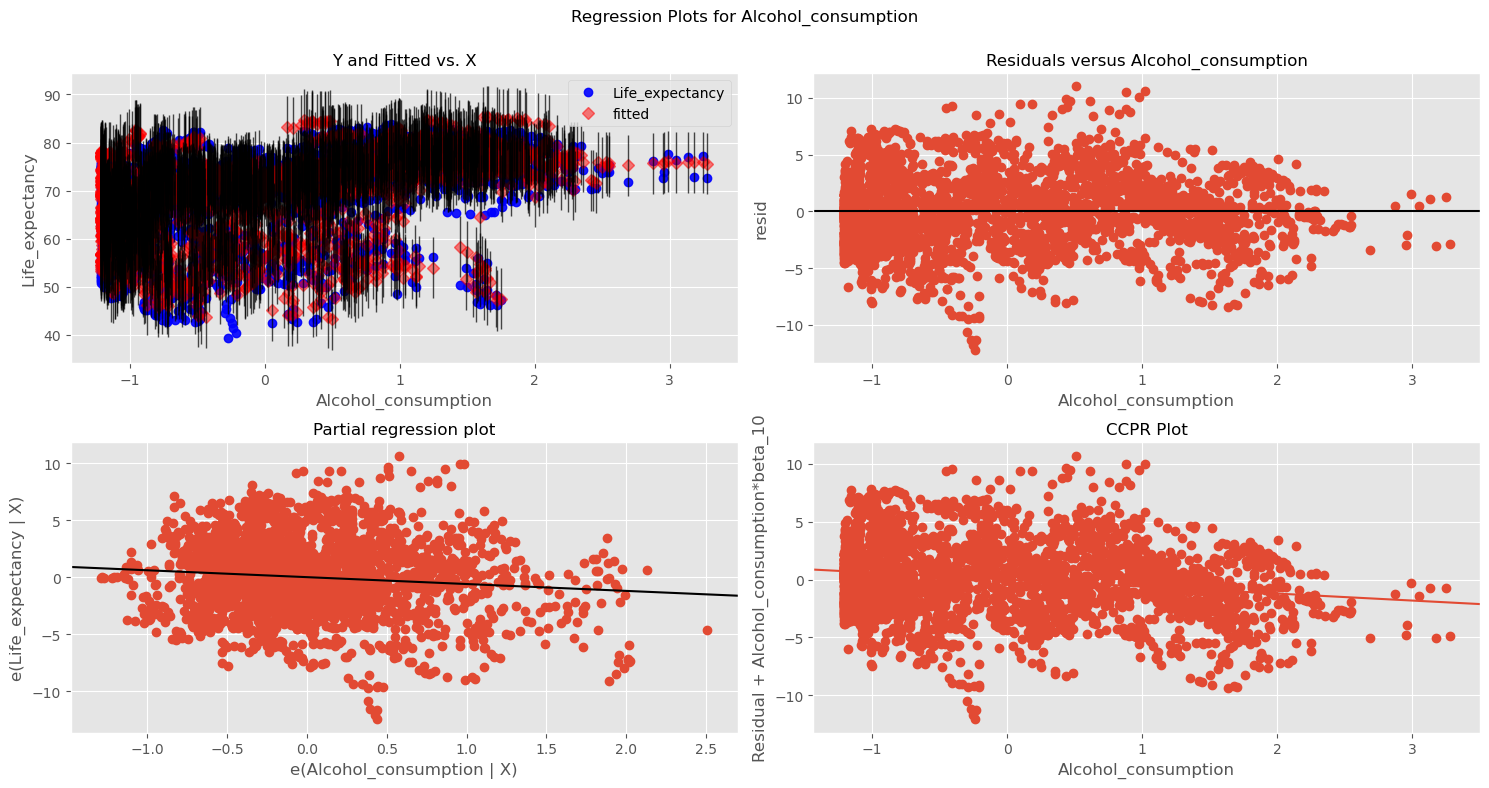

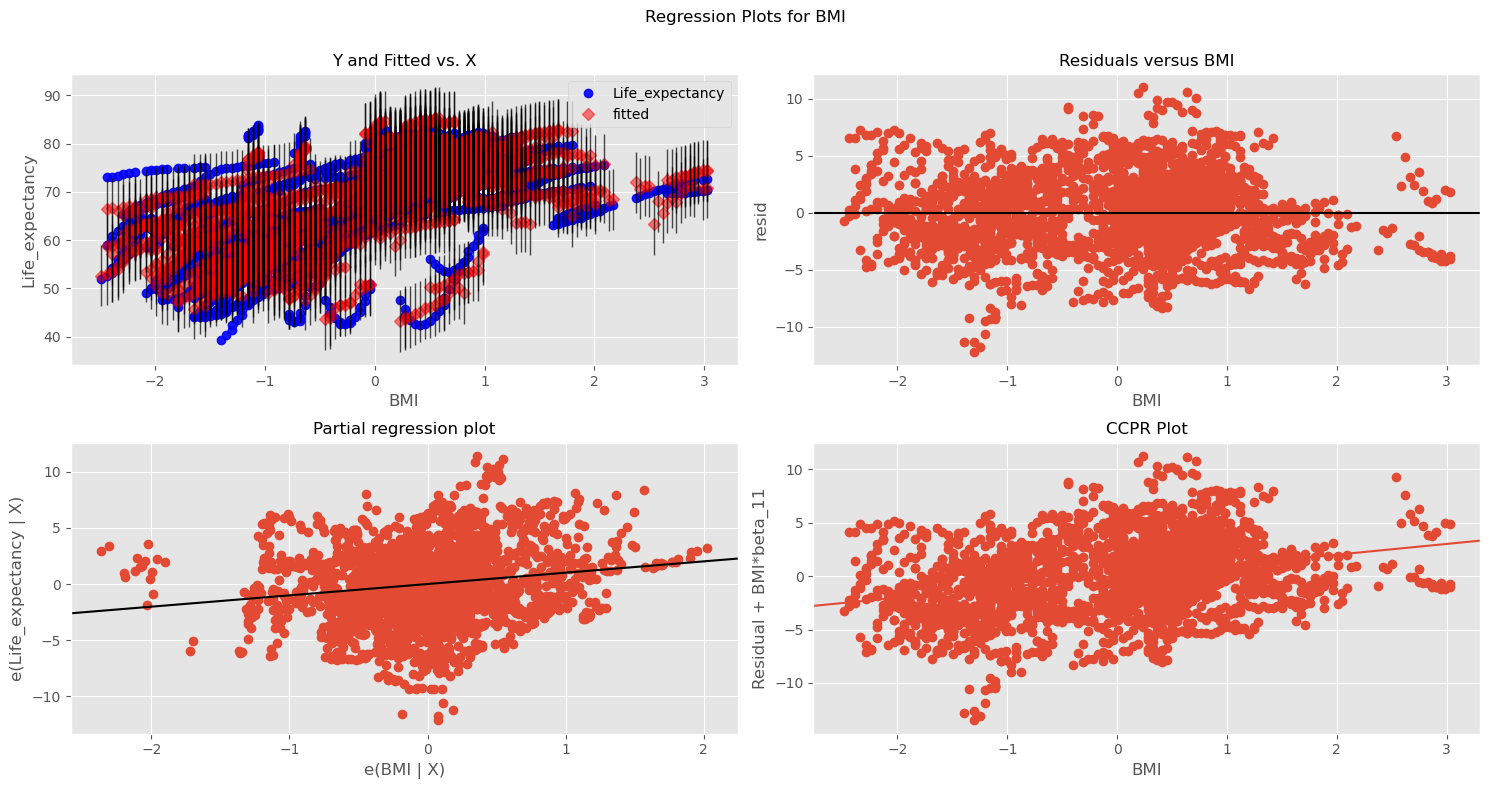

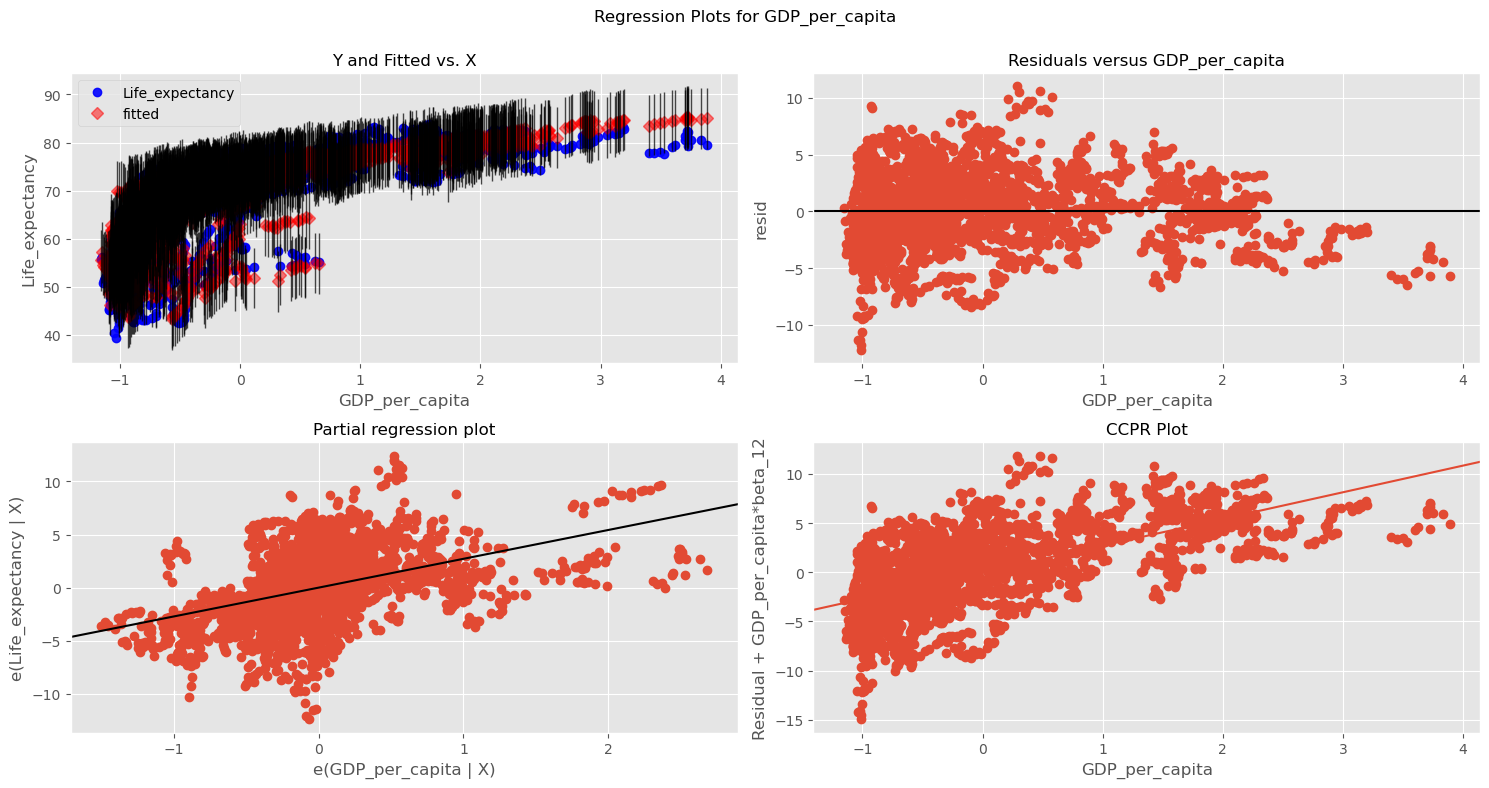

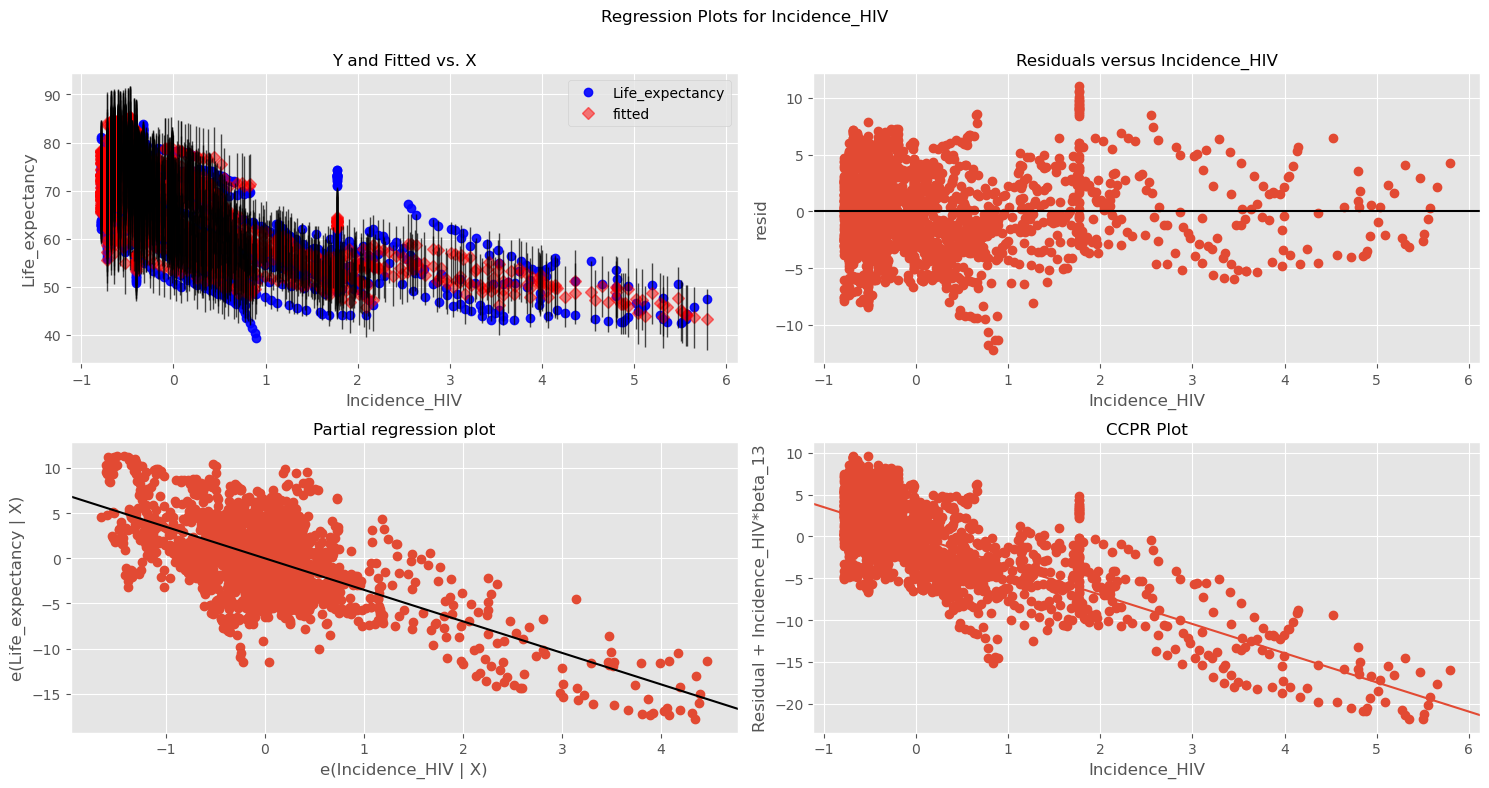

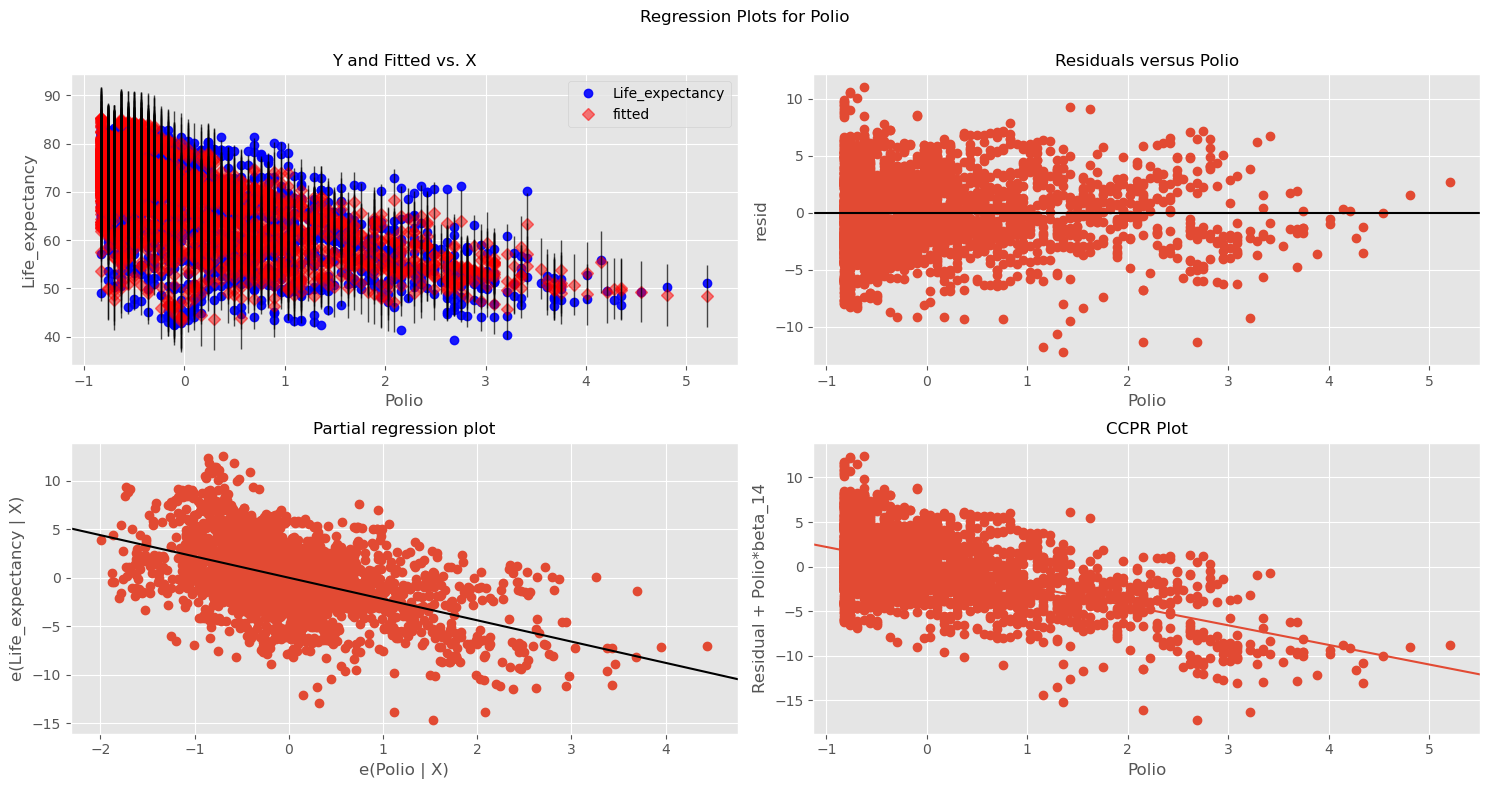

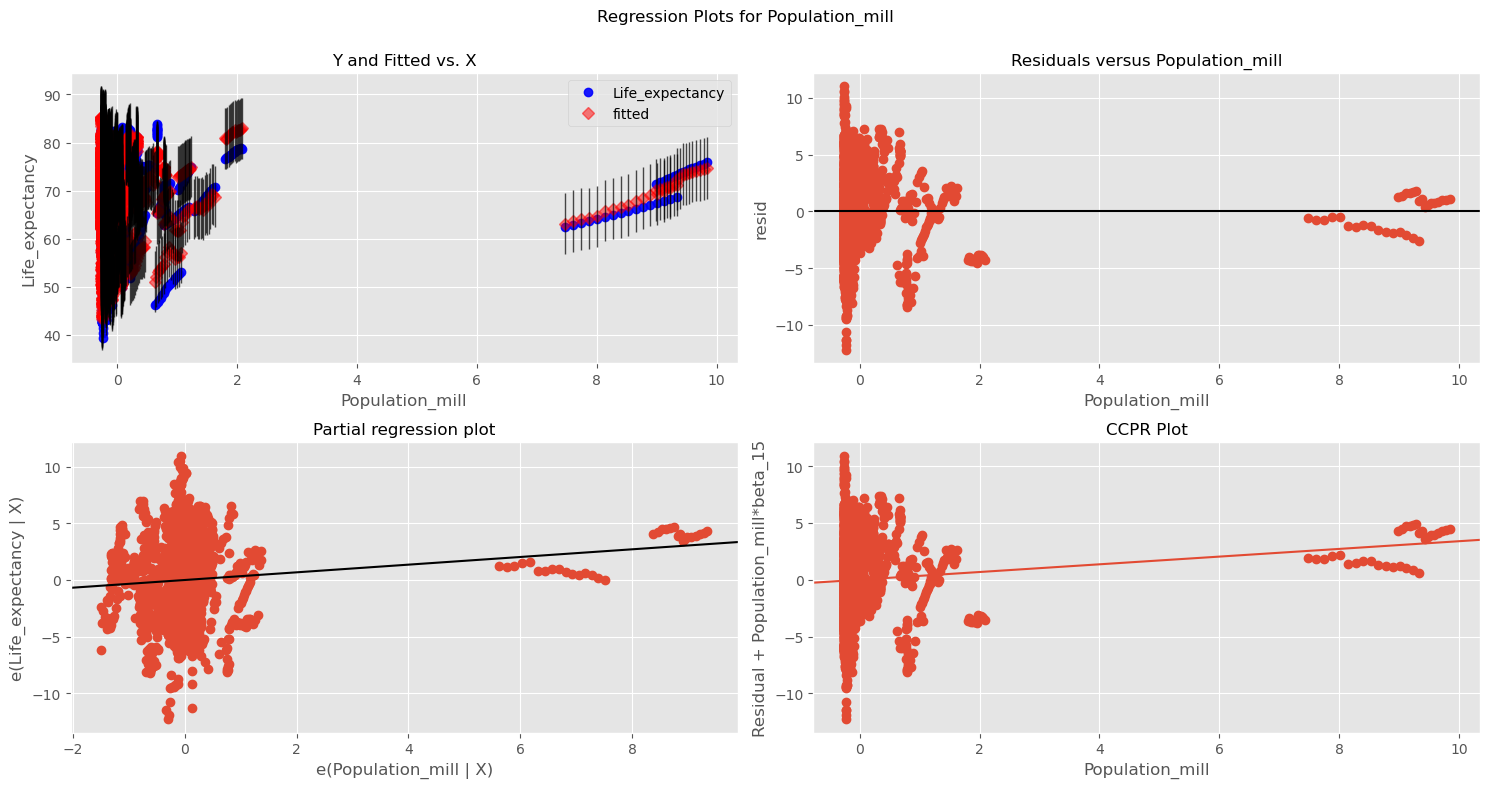

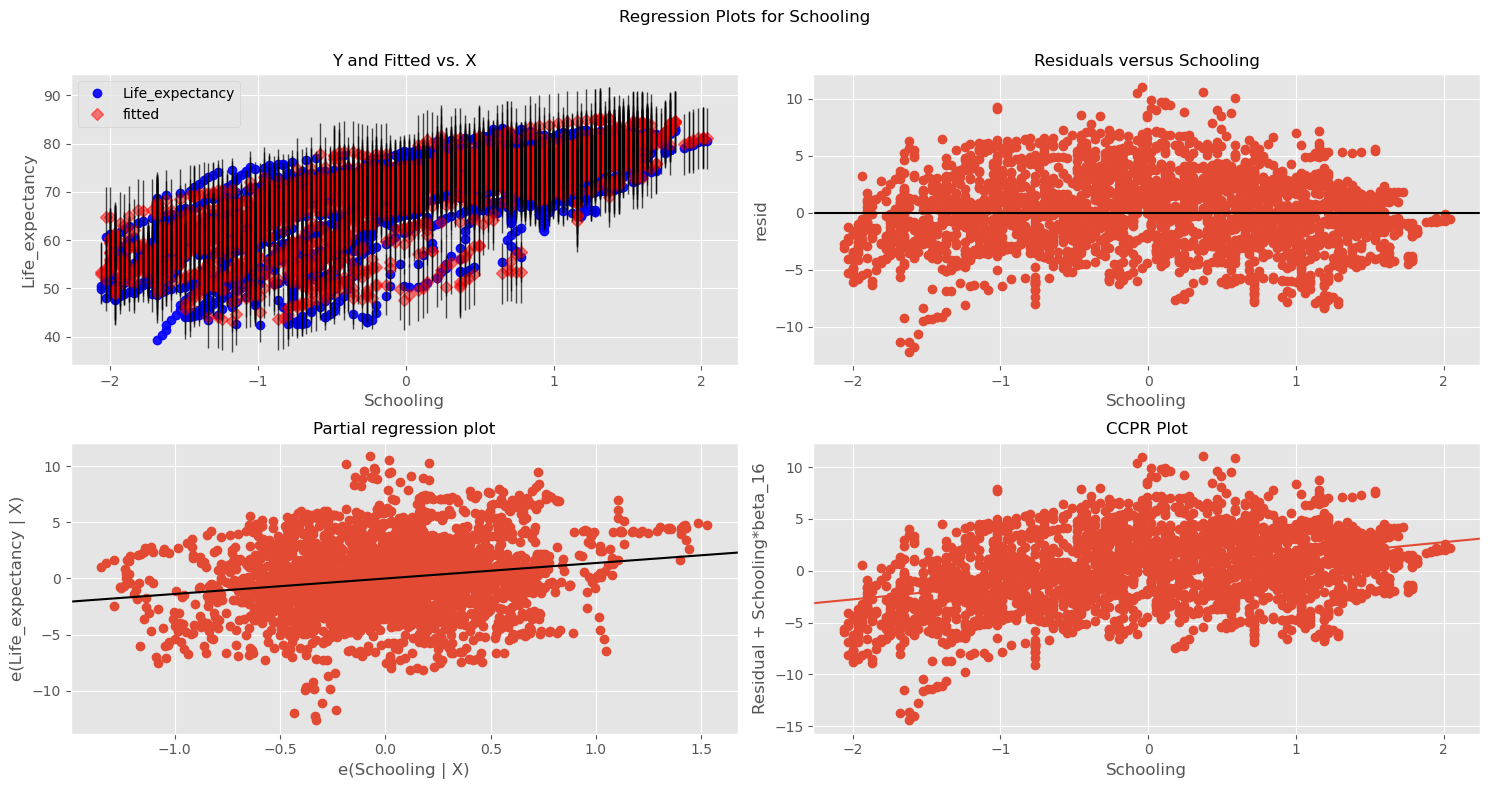

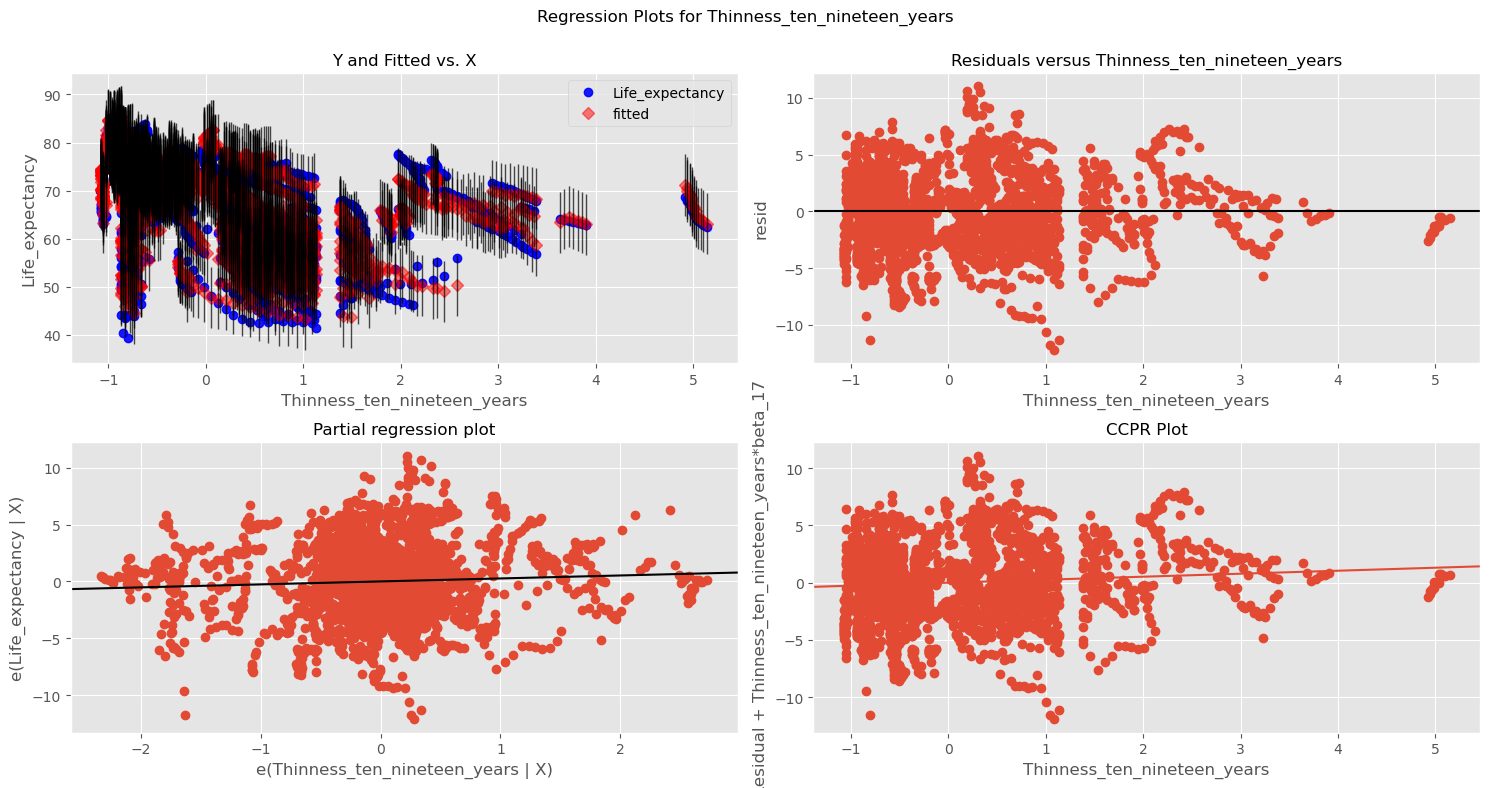

In [34]:
# List of predictor variables for which you want to create diagnostic plots
predictor_variables = ["Alcohol_consumption", "BMI","GDP_per_capita", "Incidence_HIV","Polio","Population_mill","Schooling","Thinness_ten_nineteen_years"]

# Create a loop to generate diagnostic plots for each predictor
for predictor in predictor_variables:
    try:
        fig = plt.figure(figsize=(15, 8))
        fig = sm.graphics.plot_regress_exog(model, predictor, fig=fig)
        plt.show()
    except ValueError:
        print(f"'{predictor}' is not in the list of DataFrame columns.")


C:\Users\Kristy\AppData\Local\Temp\ipykernel_9688\3740694945.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


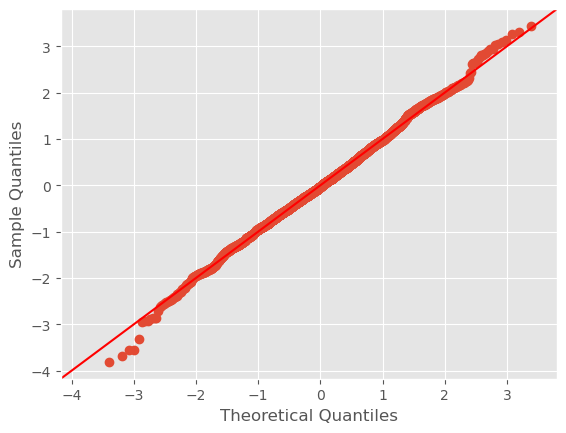

In [35]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

#### Train-test 

In [36]:
# make a copy in case we want to undo something without having to re-run everything
dfx = dfc.copy()

In [37]:
# OLS automatically does one hot encoding
# the other library that is used for train-test does not
# also Africa is the region that was dropped for one-hot encoding, but is likely the worst place to live, 
    # so lets use a different reference
dfx['Region'] = dfx['Region'].astype('category')
dfx = pd.get_dummies(dfx, columns=['Region'], prefix=['Region'])

# convert to str
regions = dfc['Region'].unique()
for reg in regions:
    dfx['Region_'+reg] = dfx['Region_'+reg].astype(str)

dfx.columns = dfx.columns.str.replace(' ', '_')    
    
# drop European Union for dummy variable trap (makes it the reference)
dfx.drop(columns=['Region_European_Union'], inplace=True)

In [38]:
# re-calculate model with the EU as reference and with manual one-hot encoding
outcome = 'Life_expectancy'
predictors = dfx.drop('Life_expectancy',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [39]:
model = ols(formula=formula,data=dfx).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1274.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:55:24   Log-Likelihood:                -7399.9
No. Observations:                2864   AIC:                         1.484e+04
Df Residuals:                    2846   BIC:                         1.494e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    68.7837      0.380    181.205      0.000      68.039      69.528
Economy_status_Developed[T.1]                 1.8357      0.397      4.626      0.000       1.058       2.614
Region_Africa[T.1]                           -2.3394      0.427     -5.480      0.000      -3.176      -1.502
Region_Asia[T.1]                             -0.1846      0.430     -0.429      0.668      -1.029       0.659
Region_Central_America_and_Caribbean[T.1]     2.5665      0.409      6.278      0.000       1.765       3.368
Region_Middle_East[T.1]                      -0.2684      0.462     -0.581      0.561      -1.174       0.637
Region_North_America[T.1]                    -0.5579      0.524     -1.065      0.287      -1.585       0.469
Region_Oceania[T.1]                          -1.1140      0.416     -2.681      0.007      -1.929      -0.299
Region_Rest_of_Europe[T.1]                    0.3463      0.364      0.952      0.341      -0.367       1.060
Region_South_America[T.1]                     2.7538      0.433      6.357      0.000       1.904       3.603
Alcohol_consumption                          -0.6034      0.110     -5.493      0.000      -0.819      -0.388
BMI                                           1.0072      0.113      8.931      0.000       0.786       1.228
GDP_per_capita                                2.7133      0.108     25.060      0.000       2.501       2.926
Incidence_HIV                                -3.4896      0.082    -42.491      0.000      -3.651      -3.329
Polio                                        -2.1974      0.076    -28.929      0.000      -2.346      -2.048
Population_mill                               0.3390      0.066      5.171      0.000       0.210       0.468
Schooling                                     1.3805      0.132     10.433      0.000       1.121       1.640
Thinness_ten_nineteen_years                   0.2615      0.091      2.884      0.004       0.084       0.439
==============================================================================
Omnibus:                        5.067   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                5.662
Skew:                           0.031   Prob(JB):                       0.0590
Kurtosis:                       3.209   Cond. No.                         35.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Kristy\AppData\Local\Temp\ipykernel_9688\3740694945.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


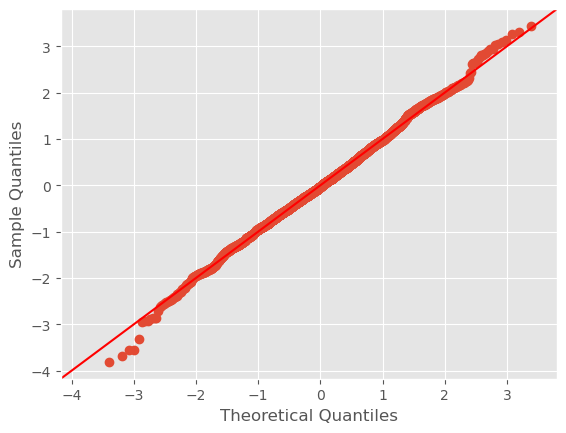

In [40]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Train-test data next. 

In [41]:
# split the data into train and test using default 75-25 split
from sklearn.model_selection import train_test_split

X = dfx.drop("Life_expectancy", axis=1)
y = dfx["Life_expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [42]:
# Linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [43]:
linreg.fit(X_train, y_train)

LinearRegression()

In [44]:
# Generated Predictions on Training and Test Sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [45]:
# Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

train_r_squared = r2_score(y_train, y_hat_train)
test_r_squared = r2_score(y_test, y_hat_test)
print('Train R^2:', train_r_squared)
print('Test R^2: ', test_r_squared)

Train Mean Squared Error: 10.465508645105695
Test Mean Squared Error:  9.759072100472272
Train R^2: 0.8833035033478034
Test R^2:  0.8847102707816348
